# Install Dependencies

In [ ]:
!pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Directory Setup

In [ ]:
!rm -rf /content/sample_data/
!mkdir /content/data/ /content/data/raw/ /content/data/processed/

# Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power.

# Content & Explanation
### Attribute Information of [credit_card_applications.csv](https://miles-become-a-data-scientist.s3.us-east-2.amazonaws.com/J1/M7/data/raw/credit_card_applications.csv): 		
`ID`:	Client number	
`CODE_GENDER`:	Gender	
`FLAG_OWN_CAR`:	Is there a car	
`FLAG_OWN_REALTY`:	Is there a property	
`CNT_CHILDREN`:	Number of children	
`AMT_INCOME_TOTAL`:	Annual income	
`NAME_INCOME_TYPE`:	Income category	
`NAME_EDUCATION_TYPE`:	Education level	
`NAME_FAMILY_STATUS`:	Marital status	
`NAME_HOUSING_TYPE`:	Way of living	
`DAYS_BIRTH`:	Birthday. Count backwards from current day (0), -1 means yesterday.

`DAYS_EMPLOYED`:	Start date of employment. Count backwards from current day(0). If positive, it means the person currently unemployed.

`FLAG_MOBIL`:	Is there a mobile phone	
`FLAG_WORK_PHONE`:	Is there a work phone	
`FLAG_PHONE`:	Is there a phone	
`FLAG_EMAIL`:	Is there an email	
`OCCUPATION_TYPE`:	Occupation	
`CNT_FAM_MEMBERS`:	Family size	
`DEFAULT_RISK`:	The applicant has a high default risk

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, chi2


# Load Data

In [ ]:
credit_df = pd.read_csv('https://miles-become-a-data-scientist.s3.us-east-2.amazonaws.com/J1/M7/data/raw/credit_card_applications.csv')

# Hold Your Breath... I Smell a High Credit Default Risk!

![something fishy going on here](https://media2.giphy.com/media/xTiIzMvevaoCXJk7HG/giphy.gif?cid=ecf05e47xd62svnyasn8fz3qdwqm4z9pifedexzvy2y6j5xk&rid=giphy.gif&ct=g)

This is your last challenge to finish your first Journey. Are you ready to put yourself to the test and apply everything that you've learned until now? Let's see...

Your main objective is to fully explore this credit card application dataset and understand what can lead an applicant to have a high credit default risk. When se speak of default risk, we’re referring to the risk that a lender takes on in the chance that a borrower will be unable to make the required payments on their debt obligation.

Good luck!

## What kind of questions to ask?


The deeper you can explore and understand a dataset, the better you'll be at developing possible solutions. And the best way to do that is to ask a lot of questions! 

Be genuinely curious and skeptical of everything you find. Here are some example questions for this Mission that you can make:
* What seem to be the main contributing variables/features to a high (or low) default risk? Are they significant? Can you try to explain why?
* What about the least contributing ones (if at all)? Do they make sense why?
* Should we reject applicants according to all of these variables? If not, which ones we shouldn't consider and why? Don’t forget that credit card applications tend to have a meaningful impact on people’s lives, we need to choose our variables ***carefully***.
* Are there any other variables that you would like to have in order to better understand credit default risk? Which ones would you like to have?

Remember to support your conclusions with visualizations! 

## The main Data Science pitfalls to be aware of






### 1. Not spending enough time understanding the problem

It's very tempting to immediately start looking at the data and start coding. However, as one gains experience as a Data Scientist, it gets clearer that understanding the problem first is crucial:
* If you've never read about credit lending, it will be very easy to naively believe most of what you see in the data and likely to make a few false conclusions. The only thing that you will have to be skeptical is common sense, but even common sense can fail.
* You will have enough knowledge to know if you need to gather other important factors/variables that are missing in the data. You'll also know a few important variables that you can extract from the data you already have.
* It will be easier to define metrics and goals for your problem.

So, take your time and do some research of the problem's domain before jumping head on with the code and data analysis.

### 2. Skipping doing Exploratory Data Analysis (or doing little of it)

Exploratory Data Analysis (EDA), is essentialy what you're doing with this Mission! Of course that that we'll say that it is very important... Jokes aside, EDA is most likely the second most important thing to do, followed by understanding the problem itself.

EDA is dedicated to uncovering patterns and features within the dataset, identifying issues, forming hypotheses surrounding data questions, and creating a visual demonstration of the findings. 

Exploratory Data Analysis allows to identify issues early on to ensure that the data going into Machine Learning (ML) models is both accurate and consistent and will provide valid, unbiased results. Remember: data quality directly impacts model accuracy and robustness. 

Also, if you're lucky, it is also possible to lead to some new variable ideas for feature engineering!

### 3. Cleaning the data before doing EDA

It is advised to do data cleaning ***after*** doing EDA. By cleaning the data before doing EDA, you are doing the following:
* You are cleaning the data without an in-depth knowledge of it. This tends to lead to poor data cleaning, and thus, poorer data science solutions;
* You are possibly distorting variable distributions (due to filled missing values, for instance);
* You might be removing outliers that might not be outliers. Imagine that failed credit applications tend to have much lower income (and you don't know this yet). Then, you removed several outliers with low income. This way, you ended up removing an important part of the dataset!

### 4. Assuming that correlation implies causation

And again, ***correlation does not imply causation!*** There, it is said. You've seen in the previous Missions that correlation is a statistical technique that refers to how two variables (x, y) change together. When x increases, y increases, which means that x and y are correlated. But, it doesn’t always mean that x causes y or y causes x. Unfortunately, it is common to say x causes y because x and y are correlated, but this isn’t always true.

A healthy dose of skepticism helps a lot here. You observe a high correlation? Then, it is time to do hypothesis testing! Or even AB testing if you have the luxury! The more tests you do, the more assured you can be of a possible causal relationship.

### 5. Not considering other datasets to join with your data

This is one of those things that you only really know after trying looking for it. In the beginning of each data science project you have time. A good use of that time is to explore the database for other tables or files that might have features that can actually help with the problem at hand. Try asking your team or even colleagues that are closer to the problem at hand if they know if there are other different features that you could gather.

Don't forget that external datasets may help sometimes! Imagine that you're trying to build a solution that predicts the estimated delivery dates for an online e-commerce platform. Trying to get a dataset with country holidays or with weather conditions could be very useful!

## Data Overview

In [ ]:
print(credit_df.shape)
credit_df.head()

(36457, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DEFAULT_RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [ ]:
credit_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
DEFAULT_RISK             int64
dtype: object

In [ ]:
#the total number of missing values with .isnull().sum()

credit_df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
DEFAULT_RISK               0
dtype: int64

In [ ]:
#the total number of duplicates with .duplicated().sum()

credit_df.duplicated().sum()

0

In [ ]:
credit_df.shape

(36457, 19)

## Analyzing the Target Variable

###  `DEFAULT_RISK`

In [ ]:
#Check the possible values that DEFAULT_RISK can have and how many there with .value_counts(). How many possible values does it have?
def_risk = credit_df['DEFAULT_RISK'].value_counts()
def_risk

0    35841
1      616
Name: DEFAULT_RISK, dtype: int64

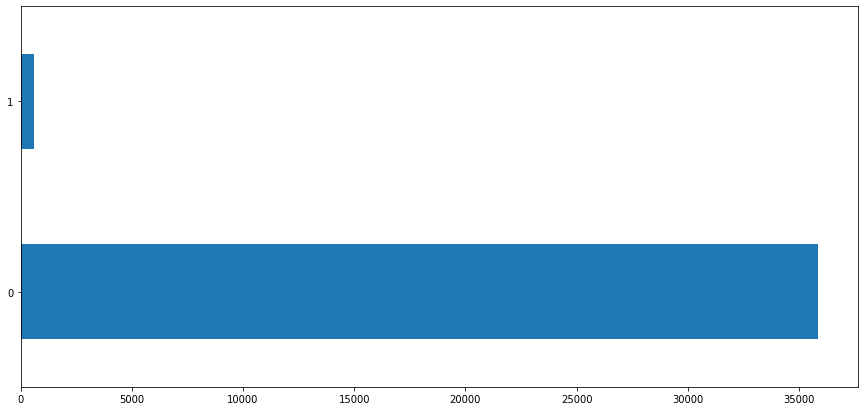

In [ ]:
#Do a bar plot with the value counts of DEFAULT_RISK. What can you say about the difference in value counts between the possible values?
def_risk.plot(kind='barh', figsize=(15,7))
plt.show()

In [ ]:
print(f'There is a huge difference between the 2 possible results')

There is a huge difference beetween the 2 possible results


In [ ]:
#If you multiply them with 100, they are simply the percentage of rows with each unique value. What is the percentage of rows with DEFAULT_RISK as 1?
def_risk_norm = credit_df['DEFAULT_RISK'].value_counts(normalize=True) * 100
def_risk_norm

0    98.310338
1     1.689662
Name: DEFAULT_RISK, dtype: float64

In [ ]:
print(f'the percentage rows with risk as 1 is aprox. 1.69%')

the percentage rows with risk as 1 is aprox. 1.69%


## Analyzing Numerical Variables

In [ ]:
#função para fazer o ttest_ind entre duas variaveis com o alpha=0.05 se são independentes ou não
def t_test_ind (df, column, target): 

  '''
  df - dataframe a usar
  column - coluna para analisar
  target - coluna alvo para analisar
  '''
  
  low_risk = df.loc[df[target] == 0, column ]
  high_risk = df.loc[df[target] == 1, column ]
  
  statistic, pvalue = ttest_ind(low_risk, high_risk)
  alpha = 0.05

  print(f"Null Hypothesis (Ho): variables {column} and {target} independent")
  print(f"Alternative Hypothesis (Ha): variables {column} and {target} aren't independent")
  print(f'\nP-value:{pvalue:.4f}         alpha={alpha}')
  

  if pvalue < alpha:
      print(f"we are rejecting the null hypothesis {pvalue:.4f}<{alpha}. Use for the model")
  else:
      print(f'we failed to reject null hypothesis {pvalue:.4f}>{alpha}.')

In [ ]:
#Função para descrever a variavel, faz um histograma e boxplot
def describe_var(df,column, target, bins):
  
  '''
  df- dataframe
  column - coluna analisar
  target - coluna alvo a analisar
  bins - numero de bins para fazer o histograma
  '''

  print(df[column].describe())
  print('\n\n')

  df[column].plot.hist(bins=bins, figsize=(13,10))
  plt.show()
  
  df.boxplot(column=column, by=target, vert=False, figsize=(19,10), notch=True)
  plt.show()

### `CNT_CHILDREN` (family size)

In [ ]:
credit_df['CNT_CHILDREN'].describe()

count    36457.000000
mean         0.430315
std          0.742367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: CNT_CHILDREN, dtype: float64

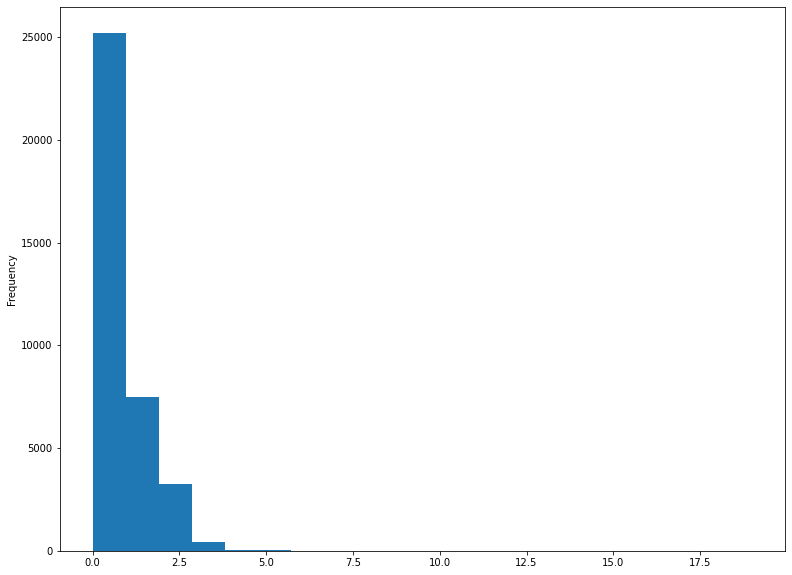

In [ ]:
credit_df['CNT_CHILDREN'].plot.hist(bins=20, figsize=(13,10))
plt.show()

O maior número de filhos é de 19, 50% dos candidatos não tem filhos, pelo histogram parece existir varios outliers(não visiveis)

O histograma tem uma distribuíção exponencial. 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


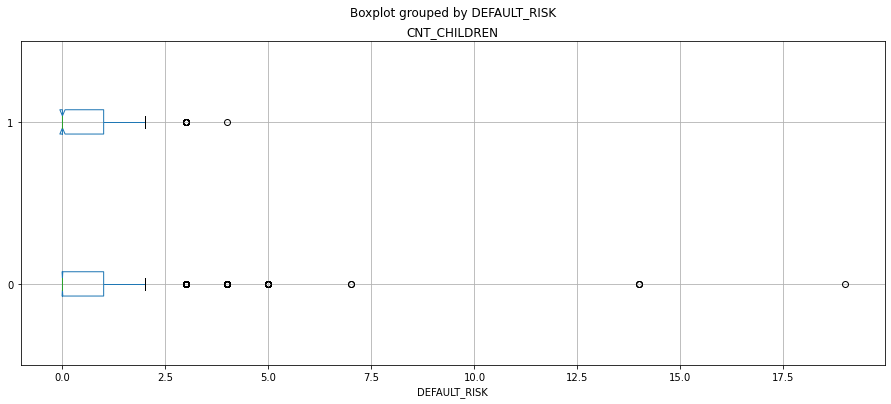

In [ ]:
credit_df.boxplot(column='CNT_CHILDREN', by='DEFAULT_RISK', vert=False, figsize=(15,6), notch=True)
plt.show()

Comparando os resultados do boxplot, não existem grandes diferenças entre os 2 grupos. 

Verificamos que entre as pessoas sem risco existem mais outliers.

In [ ]:
t_test_ind(credit_df,'CNT_CHILDREN','DEFAULT_RISK')

Null Hypothesis (Ho): variables CNT_CHILDREN and DEFAULT_RISK independent
Alternative Hypothesis (Ha): variables CNT_CHILDREN and DEFAULT_RISK aren't independent

P-value:0.9531         alpha=0.05
we failed to reject null hypothesis 0.9531>0.05.


O número de crianças não tem um impacto significativo 

O facto de ter filhos não significa que sejam considerados de risco , existem outros factores mais importantes que podem influenciar a decisão de o serem.



**Então não deverá ser uma variavel em conta para a modelação**

### `AMT_INCOME_TOTAL` (anual income)

count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64





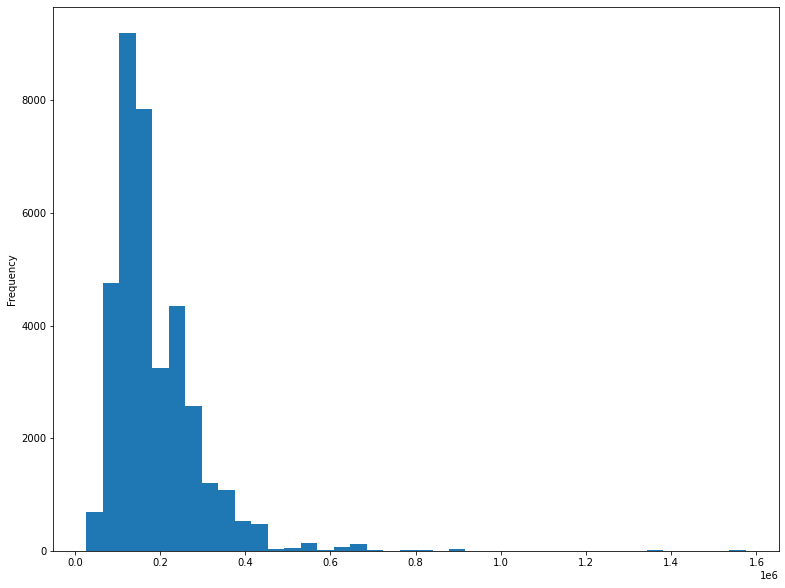

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


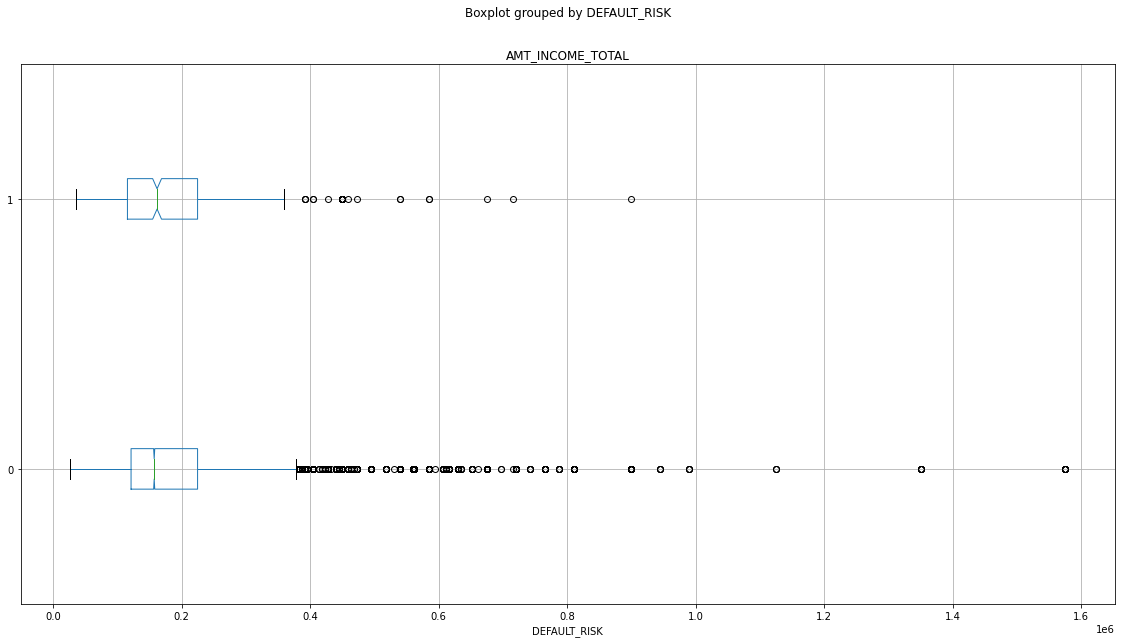

In [ ]:
describe_var(credit_df,'AMT_INCOME_TOTAL', 'DEFAULT_RISK',40)

O histogram parecer tender para uma distribuição logaritmica normal.  Existem alguns outliers


Comparando os resultados do boxplot, não existem grandes diferenças entre os 2 grupos. 

Verificamos que entre as pessoas sem risco existem mais outliers.


In [ ]:
t_test_ind(credit_df,'AMT_INCOME_TOTAL','DEFAULT_RISK')

Null Hypothesis (Ho): variables AMT_INCOME_TOTAL and DEFAULT_RISK independent
Alternative Hypothesis (Ha): variables AMT_INCOME_TOTAL and DEFAULT_RISK aren't independent

P-value:0.8400         alpha=0.05
we failed to reject null hypothesis 0.8400>0.05.


O vencimento anual pelo p-value não tem uma relação directa com o facto de poder ser um candidato de risco.


**Então não deverá ser uma variavel em conta para a modelação**

### `DAYS_BIRTH`

In [ ]:
#transformar os dias em ano e criar uma coluna para analise da variavel (-1 para colocar os numeros positivos)
credit_df['Age'] = (credit_df['DAYS_BIRTH']* -1)/365

count    36457.000000
mean        43.767598
std         11.508356
min         20.517808
25%         34.142466
50%         42.638356
75%         53.254795
max         68.909589
Name: Age, dtype: float64





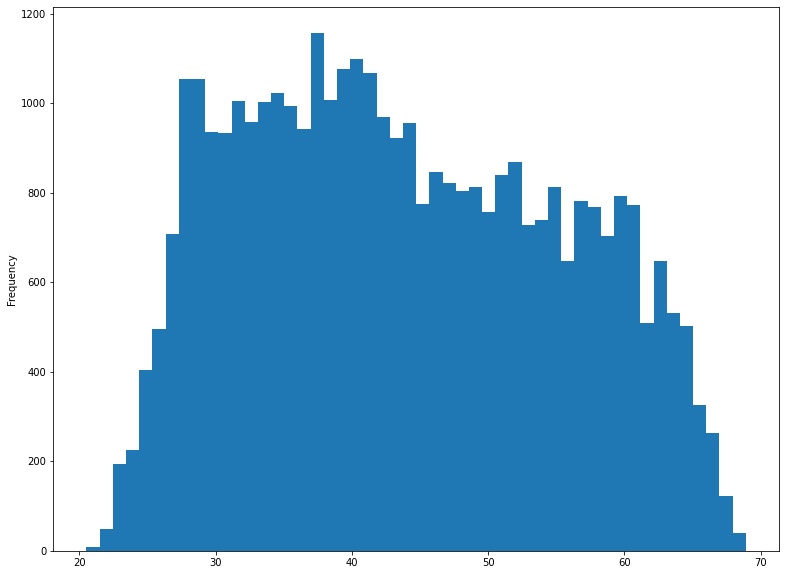

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


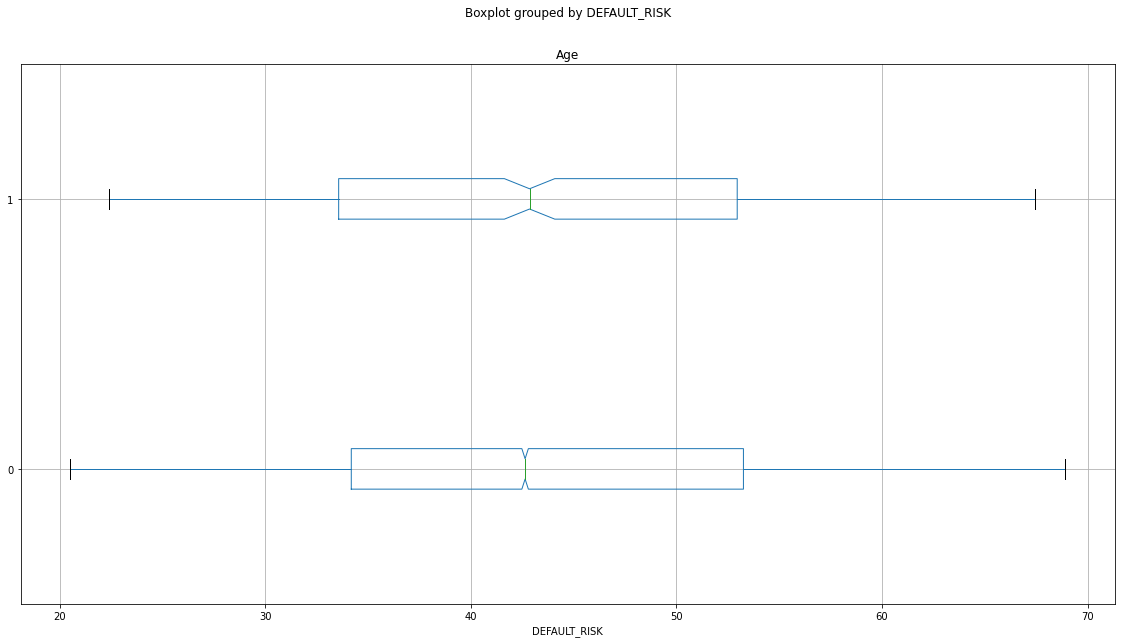

In [ ]:
describe_var(credit_df,'Age', 'DEFAULT_RISK',50)

idade mais velha que não chega aos 70 e a mais nova acima dos 20.

Comparando os resultados do boxplot, não existem grandes diferenças entre os 2 grupos.

Verificamos que não existem outliers.

In [ ]:
t_test_ind(credit_df,'DAYS_BIRTH','DEFAULT_RISK')

Null Hypothesis (Ho): variables DAYS_BIRTH and DEFAULT_RISK independent
Alternative Hypothesis (Ha): variables DAYS_BIRTH and DEFAULT_RISK aren't independent

P-value:0.7777         alpha=0.05
we failed to reject null hypothesis 0.7777>0.05.


a media de idades parece não ser significativa, nos candidatos de low risk a idade max é superior assim como a idade minima.

A idade pelo p-value não tem uma relação directa com o facto de poder ser um candidato de risco.


**Então não deverá ser uma variavel em conta para a modelação**


### `DAYS_EMPLOYED`

In [ ]:
#Verificámos que existiam outliers por isso retirámos do dataset

credit_df['employ_days'] = 1
credit_df.loc[credit_df['DAYS_EMPLOYED']<0,'employ_days'] = credit_df.loc[credit_df['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']


In [ ]:
#Transformamos a informação em anos em vez de dias para ser mais percetivel
credit_df['Years_emplyed'] = (credit_df['employ_days']* -1)/365

count    36457.000000
mean         6.027805
std          6.484803
min         -0.002740
25%          1.117808
50%          4.252055
75%          8.638356
max         43.049315
Name: Years_emplyed, dtype: float64





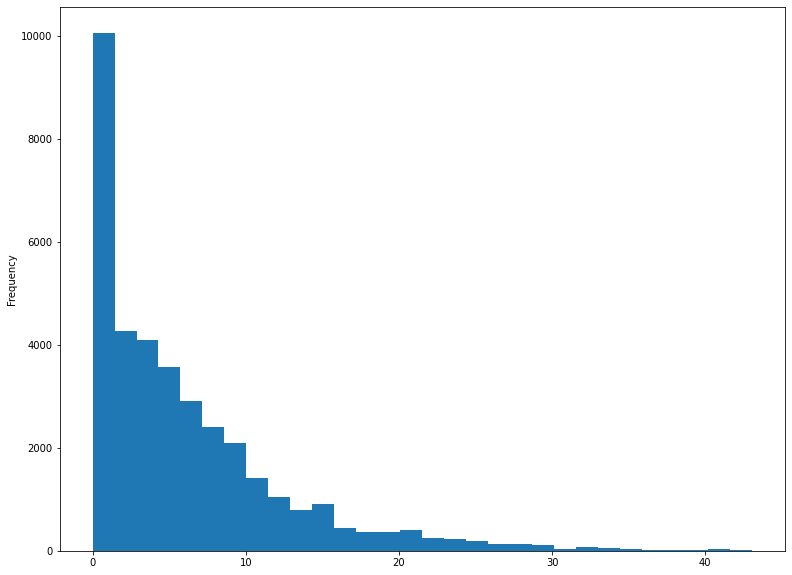

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


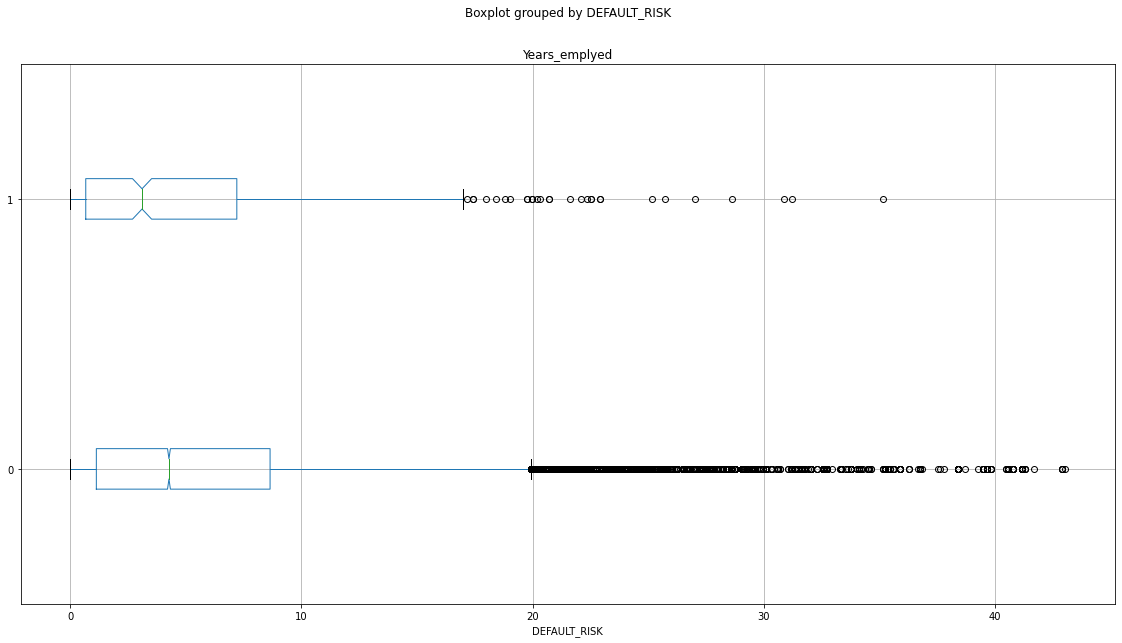

In [ ]:
describe_var(credit_df,'Years_emplyed','DEFAULT_RISK',30)

O histogram parecer tender para uma distribuição exponencial. Foram retirados os outliers

Comparando os resultados do boxplot, não existem grandes diferenças entre os 2 grupos.


In [ ]:
t_test_ind(credit_df,'Years_emplyed','DEFAULT_RISK')

Null Hypothesis (Ho): variables Years_emplyed and DEFAULT_RISK independent
Alternative Hypothesis (Ha): variables Years_emplyed and DEFAULT_RISK aren't independent

P-value:0.0000         alpha=0.05
we are rejecting the null hypothesis 0.0000<0.05. Use for the model


O valor de anos de trabalho pelo p-value tem uma relação directa com o facto de poder ser um candidato de risco.


**Então deve ser uma variavel em conta para a modelação**

### `CNT_FAM_MEMBERS`

count    36457.000000
mean         2.198453
std          0.911686
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: CNT_FAM_MEMBERS, dtype: float64





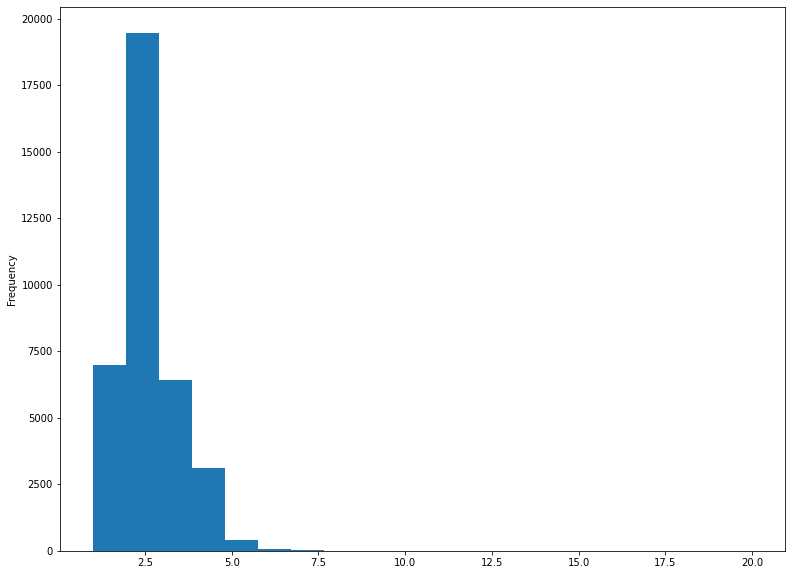

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


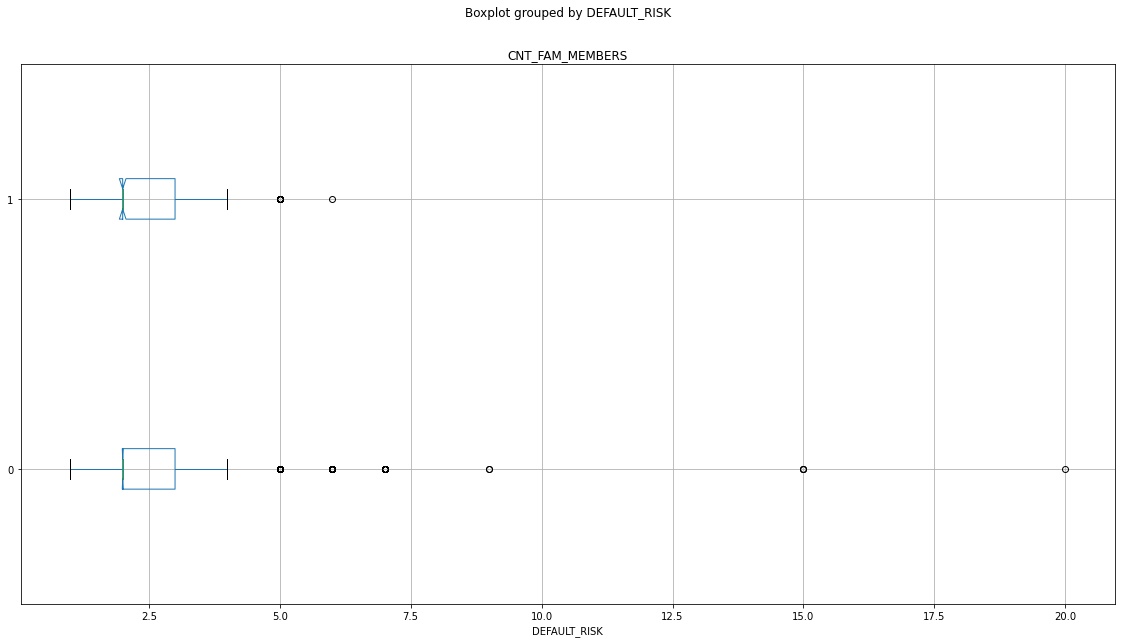

In [ ]:
describe_var(credit_df,'CNT_FAM_MEMBERS','DEFAULT_RISK',20)

O histogram parecer tender para uma distribuição logaritmica normal. Existem alguns outliers

Comparando os resultados do boxplot, não existem grandes diferenças entre os 2 grupos.



In [ ]:
t_test_ind(credit_df,'CNT_FAM_MEMBERS','DEFAULT_RISK')

Null Hypothesis (Ho): variables CNT_FAM_MEMBERS and DEFAULT_RISK independent
Alternative Hypothesis (Ha): variables CNT_FAM_MEMBERS and DEFAULT_RISK aren't independent

P-value:0.2798         alpha=0.05
we failed to reject null hypothesis 0.2798>0.05.


O facto de ter uma famila pelo p-value não tem uma relação directa com o facto de poder ser um candidato de risco.


**Então não deverá ser uma variavel em conta para a modelação**

## Analyzing Nominal Variables

Use this table as reference to interpret the Cramer's V values that you will obtain. Remember that you should obtain them if a variable has a statistically significant relationship with `DEFAULT_RISK`.

**Note:** In the end, you can still consider variables that had negligible Cramer's V values (smaller than a Small Effect).

In [ ]:
def sizes() :
  np_data = np.array([[1, .1, .3, .5],
      [2, .07, .21, .35],
      [3, .06, .17, .29],
      [4, .05,.15,.25],
      [5, .04, .13, .22]])
  return print(pd.DataFrame(np_data, columns=['DoF', 'Small', 'Medium', 'Large']))

In [ ]:
def nominal_des(df,column, target):
  '''
  df - dataframe
  column - coluna a analisar
  target - coluna alvo a analisar
  '''


  var_per =df[column].value_counts(normalize=True)
  print(f"Valor percentual da coluna:\n{var_per}\n",)

  var_qua = df[column].value_counts(normalize=False)
  print(f"Valor quantitativo da coluna:\n{var_qua}\n")

  fig, ax = plt.subplots(figsize=(15, 10))
  var_per.plot.bar()
  plt.title("Grafico de barras")
  plt.show()

  print()
  fig, ax = plt.subplots(figsize=(25, 15))
  sns.barplot(data=df, x=column, y=target)
  plt.xticks(rotation=90, ha='right')

  plt.title("Check avg for each group - default_risk")
  plt.show()

In [ ]:
def test_chi (df,column,target):
  
  '''
  df - dataframe
  column - coluna a analisar
  targer - coluna alvo a comparar
  '''

  print(f"Null Hypothesis (Ho): variables {column} and {target} are independent ") 
  print("Alternative Hypothesis (Ha): variables aren't independent\n")
  var_table =  pd.crosstab(df[column], credit_df[target])
  stat,  p, dof, expected = chi2_contingency(var_table)

  print('Contingency Table')
  print(var_table)

  # interpret test-statistic
  prob = 0.95
  '''
  critical = chi2.ppf(prob, dof)
  print(f'\nprobability={prob}, critical={critical}, stat={stat}')

  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  '''
  # interpret p-value
  alpha = 1.0 - prob

  print('\nAlpha=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0) p-value < alpha')
  else:
    print('Independent (fail to reject H0) p-value>alpha')

  return var_table

In [ ]:
def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
   
    
    # getting the chi sq. stat
    chi2 = chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}\n')
    sizes()

### `ID`

In [ ]:
credit_df['ID'].head()

0    5008804
1    5008805
2    5008806
3    5008808
4    5008809
Name: ID, dtype: int64

Trata-se de uma variavel identificativa dos clientes.

**Então não deverá ser uma variavel em conta para a modelação**

### `CODE_GENDER`

Valor percentual da coluna:
F    0.670105
M    0.329895
Name: CODE_GENDER, dtype: float64

Valor quantitativo da coluna:
F    24430
M    12027
Name: CODE_GENDER, dtype: int64



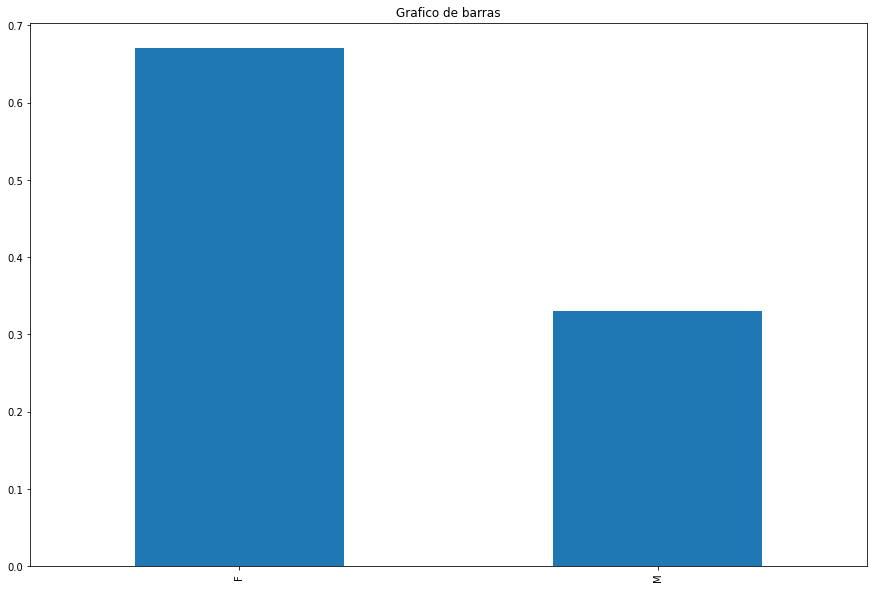

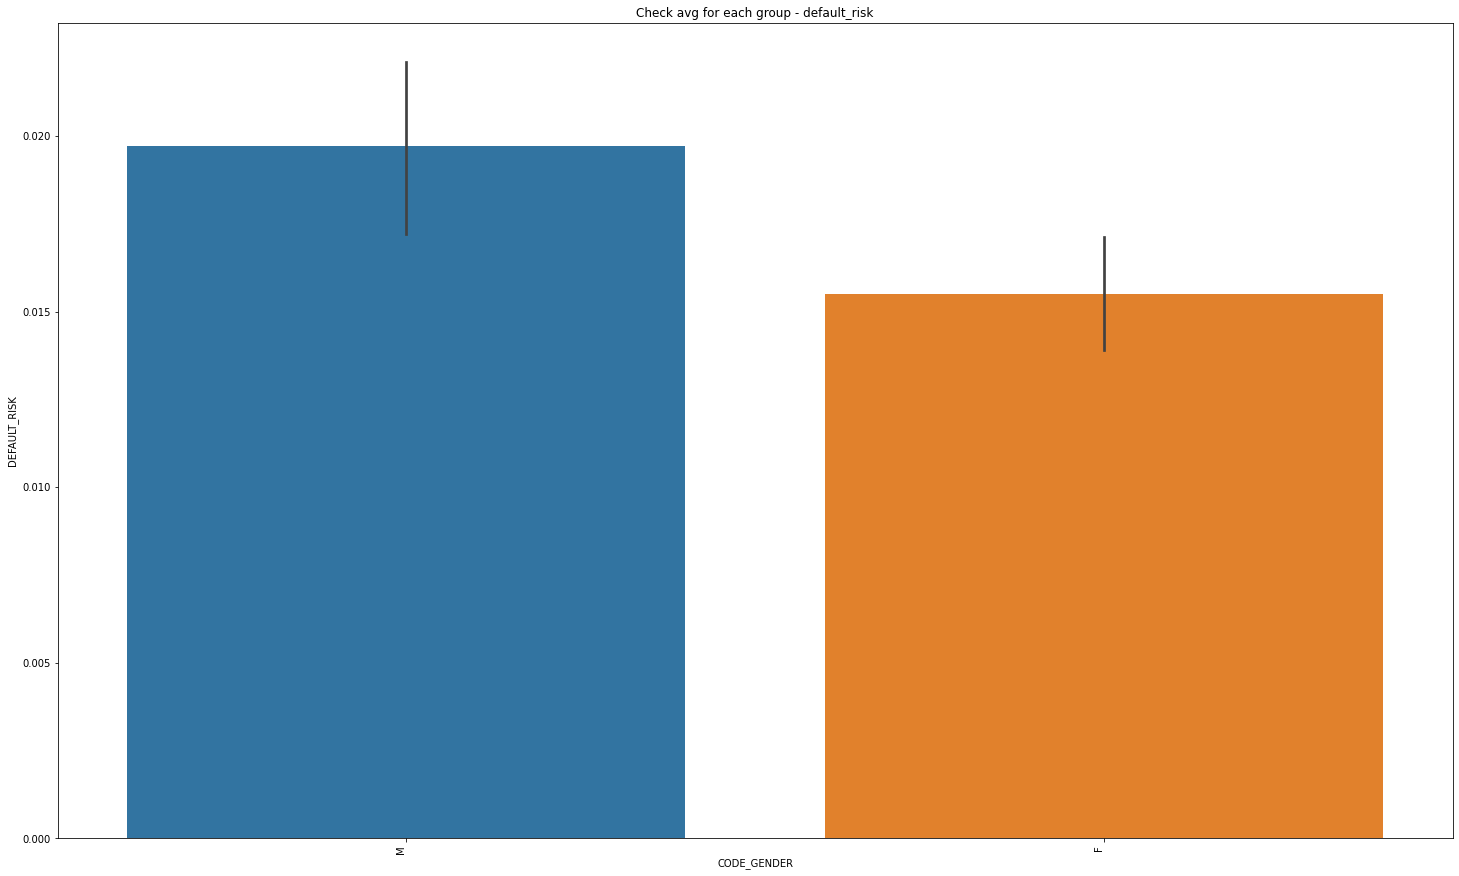

In [ ]:
nominal_des(credit_df,'CODE_GENDER','DEFAULT_RISK')

Existem mais candidatos do sexo feminino

Apesar de haverem mais mulheres do que homens, através do gráfico de barras percebemos que os homens têm uma taxa de risco ligeriramento superior. 

In [ ]:
gender_table = test_chi(credit_df,'CODE_GENDER','DEFAULT_RISK')

Null Hypothesis (Ho): variables CODE_GENDER and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
CODE_GENDER             
F             24051  379
M             11790  237

Alpha=0.050, p=0.004
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(gender_table)

V = 0.015066089564786472
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


As variaveis sao dependentes porque o seu p-value é inferior ao alfa 0.05.

Através do teste Cramers V concluímos que tem 1 grau de liberdade e tem um valor de efeito estatistico quase insignificante.


**Então deverá ser uma variavel em conta para a modelação**


### `FLAG_OWN_CAR`

Valor percentual da coluna:
N    0.620292
Y    0.379708
Name: FLAG_OWN_CAR, dtype: float64

Valor quantitativo da coluna:
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64



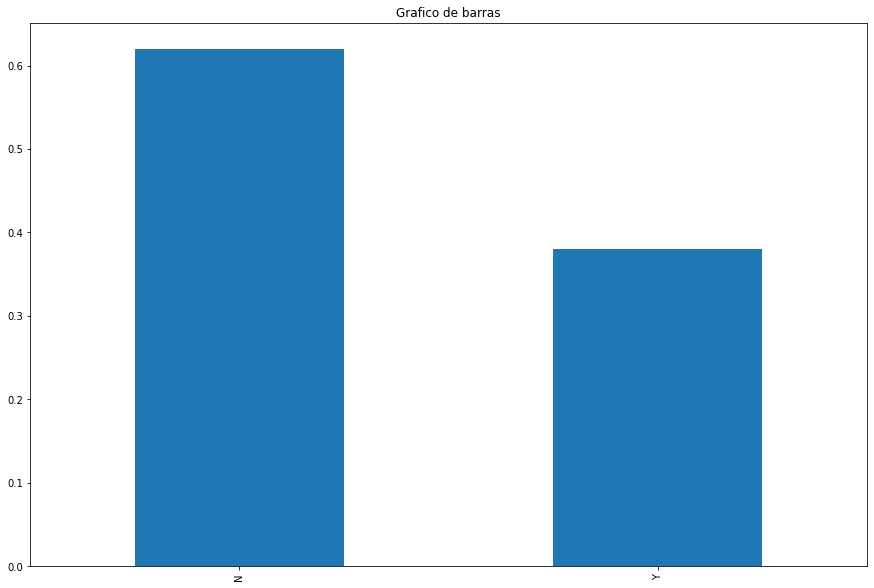

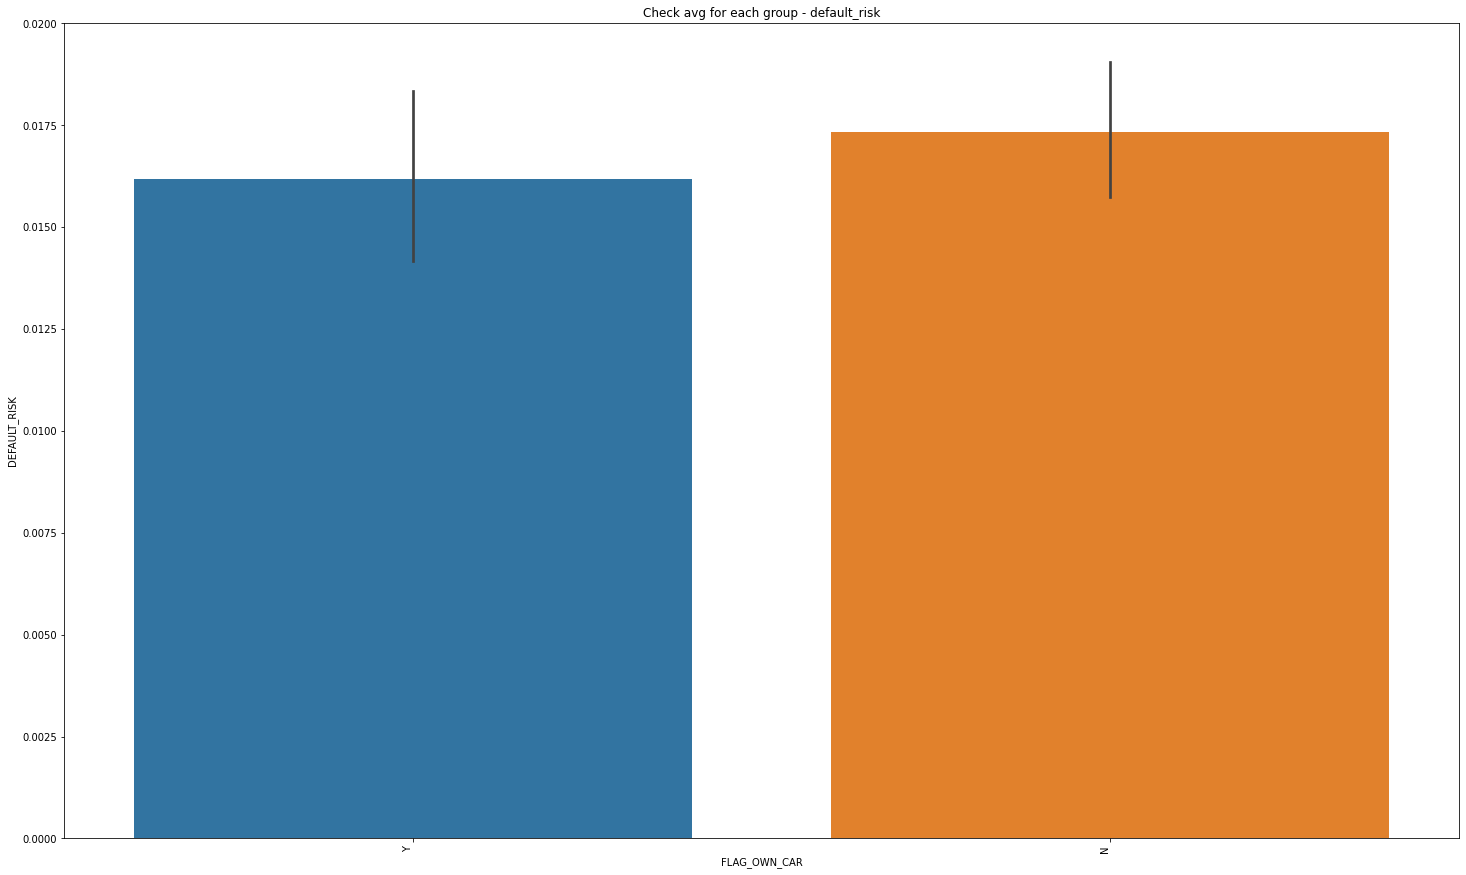

In [ ]:
nominal_des(credit_df,'FLAG_OWN_CAR','DEFAULT_RISK')

Apesar de haver mais pessoas que não têm carro, através do gráfico de barras percebemos que as pessoas que não têm carro têm uma taxa de risco ligeiramente superior. 


In [ ]:
own_car = test_chi(credit_df,'FLAG_OWN_CAR','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_OWN_CAR and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
FLAG_OWN_CAR            
N             22222  392
Y             13619  224

Alpha=0.050, p=0.431
Independent (fail to reject H0) p-value>alpha


As variaveis sao independentes porque o seu p-value é superior ao alfa 0.05 por isso não aplicamos o teste Cramer V

**Então não deverá ser uma variavel em conta para a modelação**


### `FLAG_OWN_REALTY`

Valor percentual da coluna:
Y    0.672189
N    0.327811
Name: FLAG_OWN_REALTY, dtype: float64

Valor quantitativo da coluna:
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64



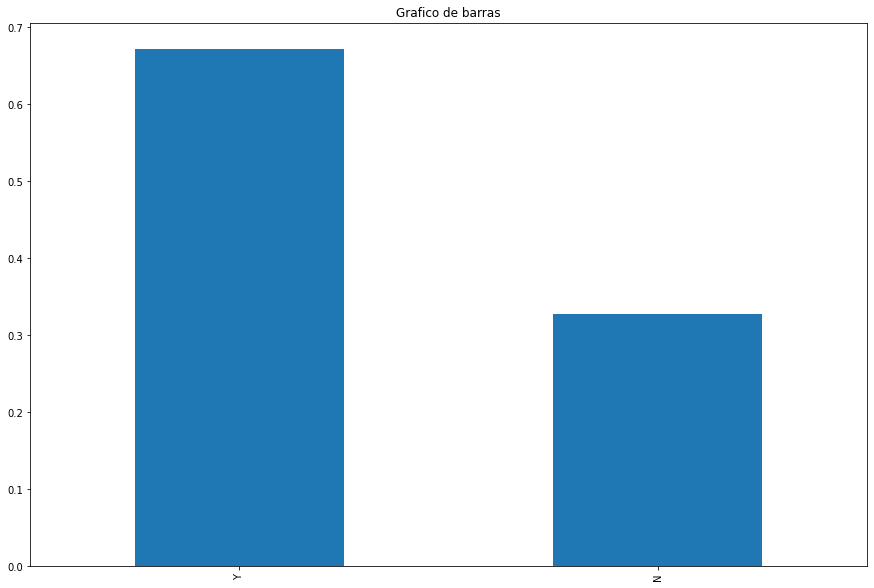

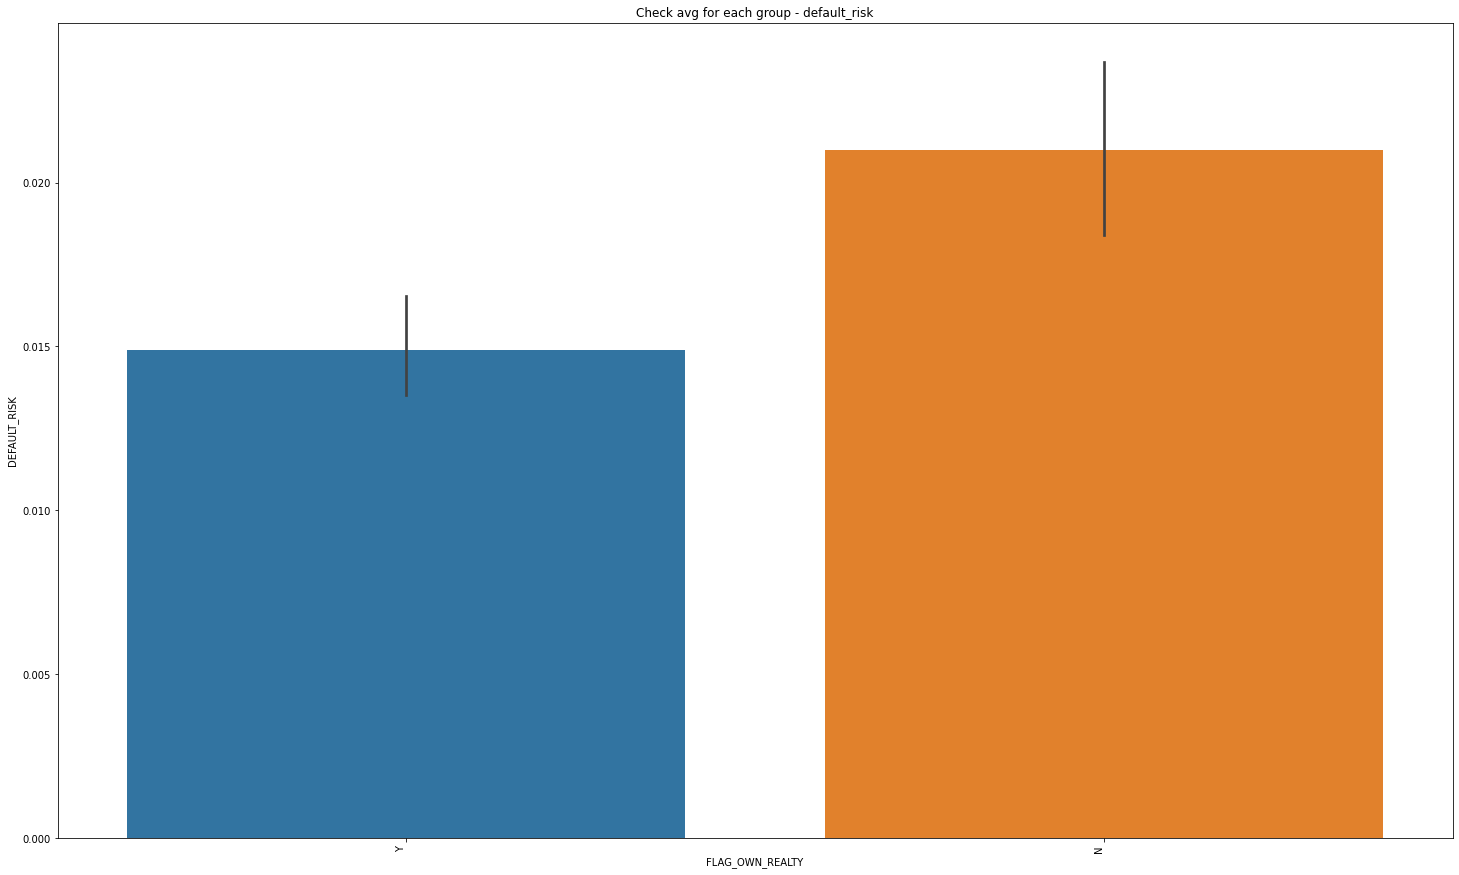

In [ ]:
nominal_des(credit_df,'FLAG_OWN_REALTY','DEFAULT_RISK' )

Mais de 67% dos candidatos tem casa. Os candidatos que não possuem casa tem uma media mais alto de serem considerado de risco. Deve existir uma relação entre as variaveis


In [ ]:
own_realty = test_chi(credit_df,'FLAG_OWN_REALTY','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_OWN_REALTY and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK         0    1
FLAG_OWN_REALTY            
N                11700  251
Y                24141  365

Alpha=0.050, p=0.000
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(own_realty)

V = 0.022019985902688603
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


As variaveis sao dependentes porque o seu p-value é inferior ao alfa 0.05.

Através do teste Cramers V concluímos que tem 1 grau de liberdade e tem um valor de efeito estatistico quase insignificante.

**Então deverá ser uma variavel em conta para a modelação**


### `NAME_INCOME_TYPE`

Valor percentual da coluna:
Working                 0.516197
Commercial associate    0.232877
Pensioner               0.168747
State servant           0.081877
Student                 0.000302
Name: NAME_INCOME_TYPE, dtype: float64

Valor quantitativo da coluna:
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64



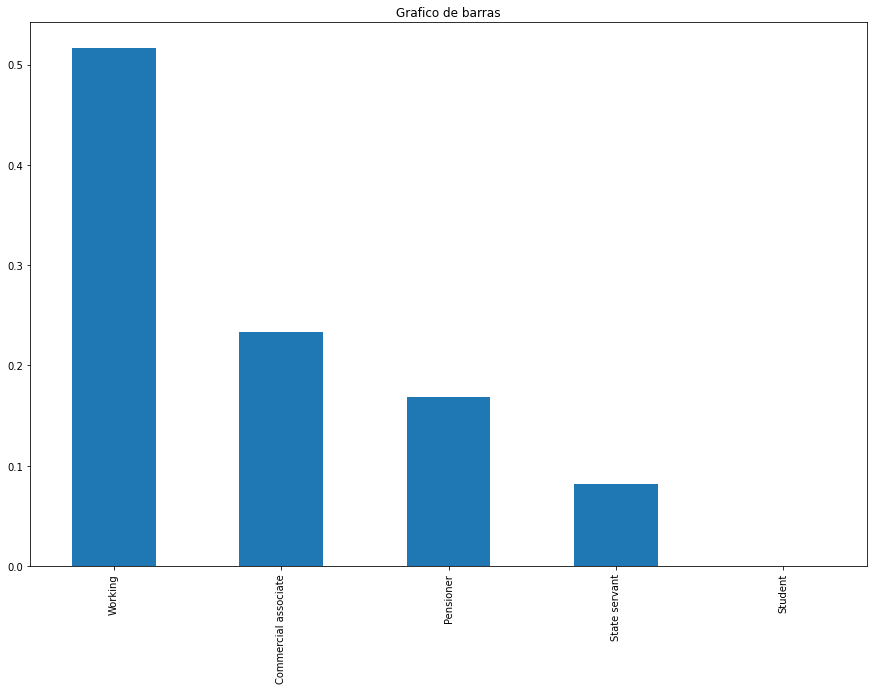

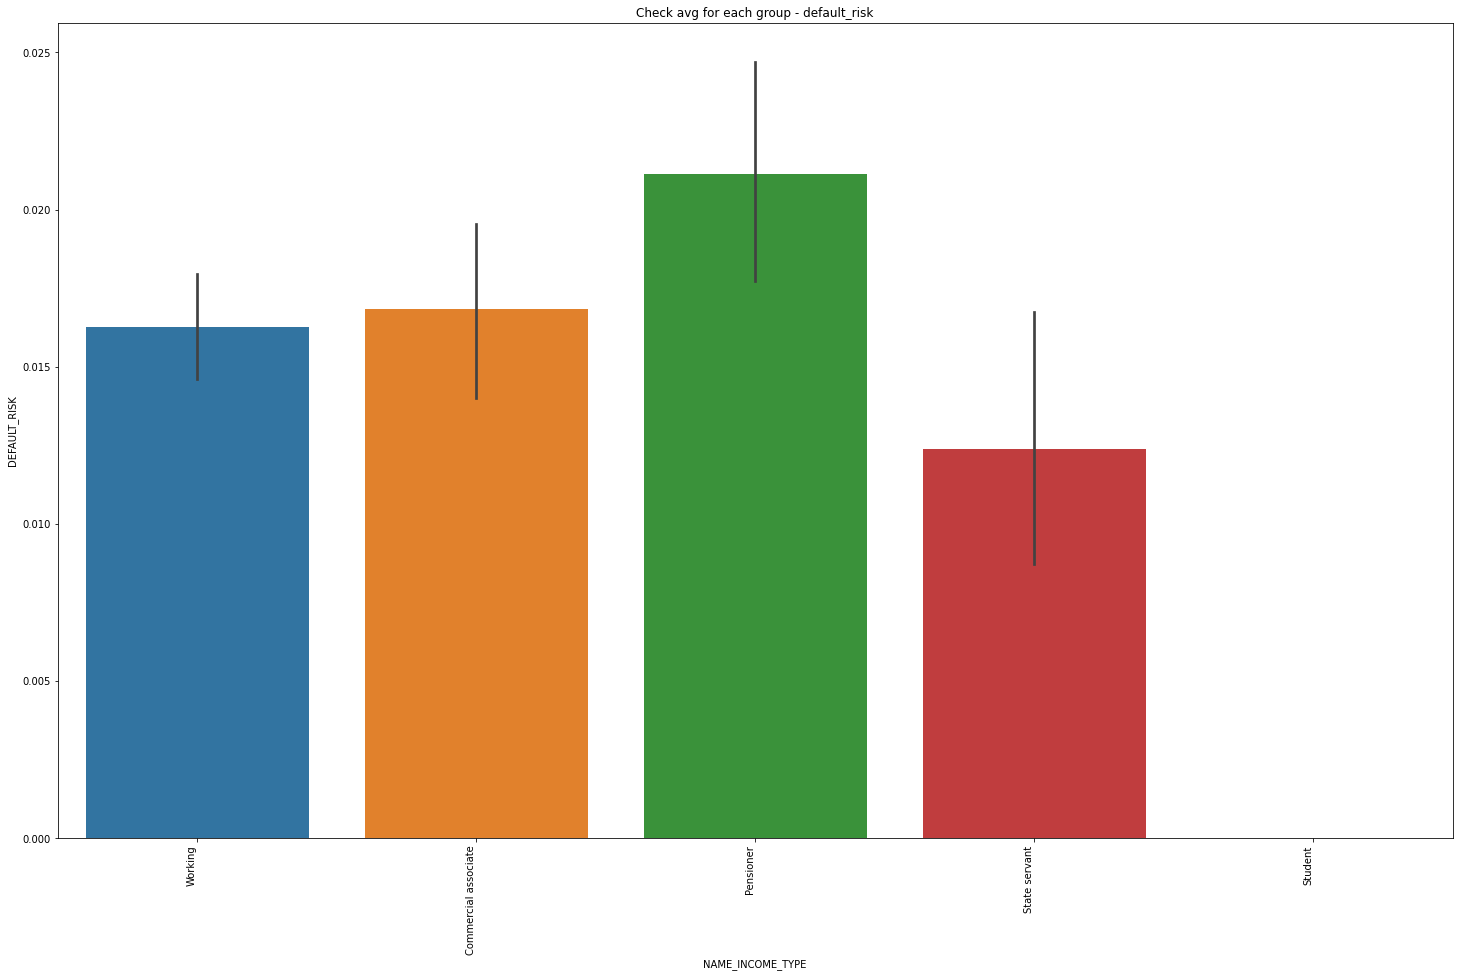

In [ ]:
nominal_des(credit_df,'NAME_INCOME_TYPE','DEFAULT_RISK')

Temos 6152 pensionistas e esses tem uma media de risco mais elevada, parece haver uma relação entre as variaveis, variavel a ser considerada


In [ ]:
income_type = test_chi(credit_df,'NAME_INCOME_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_INCOME_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK              0    1
NAME_INCOME_TYPE                
Commercial associate   8347  143
Pensioner              6022  130
State servant          2948   37
Student                  11    0
Working               18513  306

Alpha=0.050, p=0.027
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(income_type)

V = 0.017316434007565613
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


As variaveis sao dependentes porque o seu p-value é inferior ao alfa 0.05.

Através do teste Cramers V concluímos que tem 1 grau de liberdade e tem um valor de efeito estatistico quase insignificante.

Então deverá ser uma variavel em conta para a modelação


### `NAME_EDUCATION_TYPE`

Valor percentual da coluna:
Secondary / secondary special    0.679623
Higher education                 0.270565
Incomplete higher                0.038676
Lower secondary                  0.010259
Academic degree                  0.000878
Name: NAME_EDUCATION_TYPE, dtype: float64

Valor quantitativo da coluna:
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64



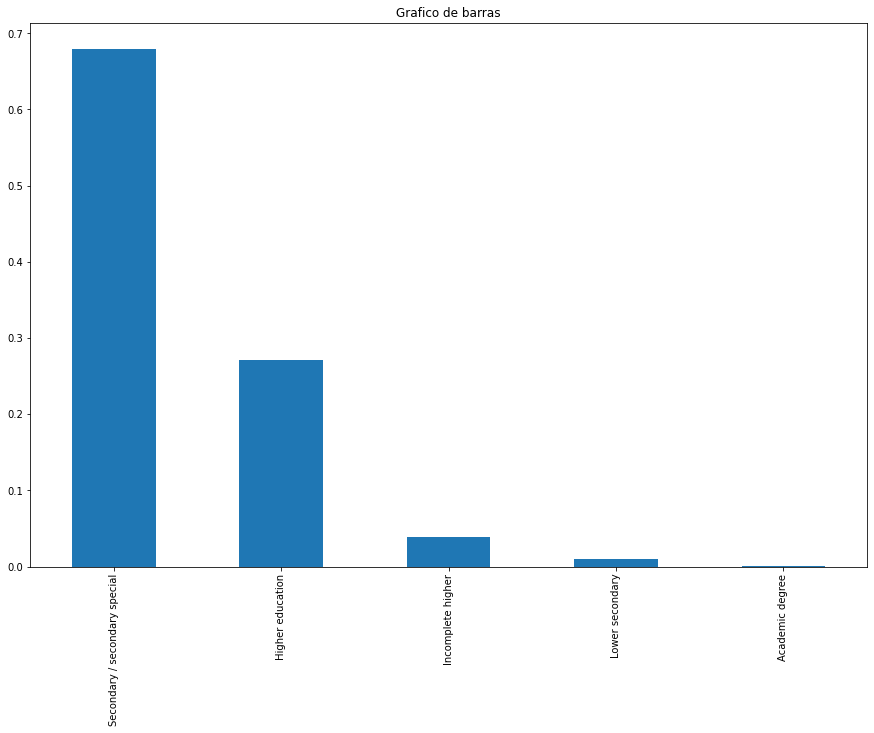

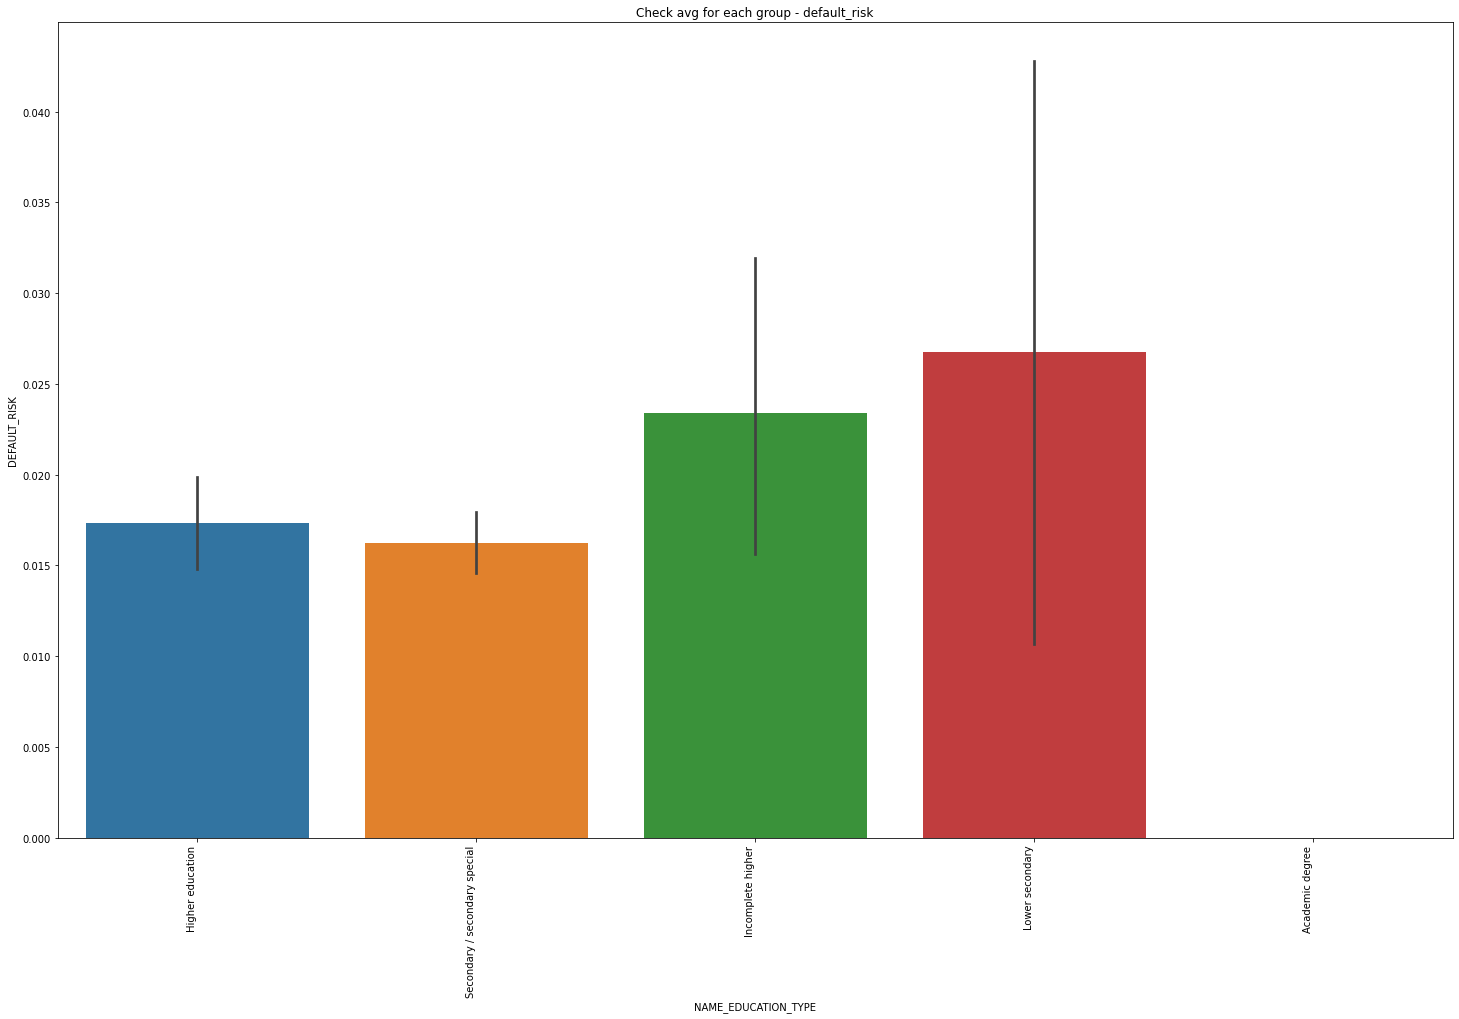

In [ ]:
nominal_des(credit_df,'NAME_EDUCATION_TYPE','DEFAULT_RISK')

as pessoas com lower secondary e incomplete tem uma media de risco mais elevada, 67% das pessoas tem nivel secundario. Parece haver alguma relação entre as variaveis


In [ ]:
education_type = test_chi(credit_df,'NAME_EDUCATION_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_EDUCATION_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK                       0    1
NAME_EDUCATION_TYPE                      
Academic degree                   32    0
Higher education                9693  171
Incomplete higher               1377   33
Lower secondary                  364   10
Secondary / secondary special  24375  402

Alpha=0.050, p=0.130
Independent (fail to reject H0) p-value>alpha


As variaveis sao independentes porque o seu p-value é superior ao alfa 0.05 por isso não aplicamos o teste Cramer V.

Verificando os valores faz sentido mesmo com um tipo de estudo não quer dizer que tenha um trabalho.


**Então deverá ser uma variavel em conta para a modelação**

### `NAME_FAMILY_STATUS`

Valor percentual da coluna:
Married                 0.687056
Single / not married    0.132457
Civil marriage          0.080780
Separated               0.057684
Widow                   0.042022
Name: NAME_FAMILY_STATUS, dtype: float64

Valor quantitativo da coluna:
Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64



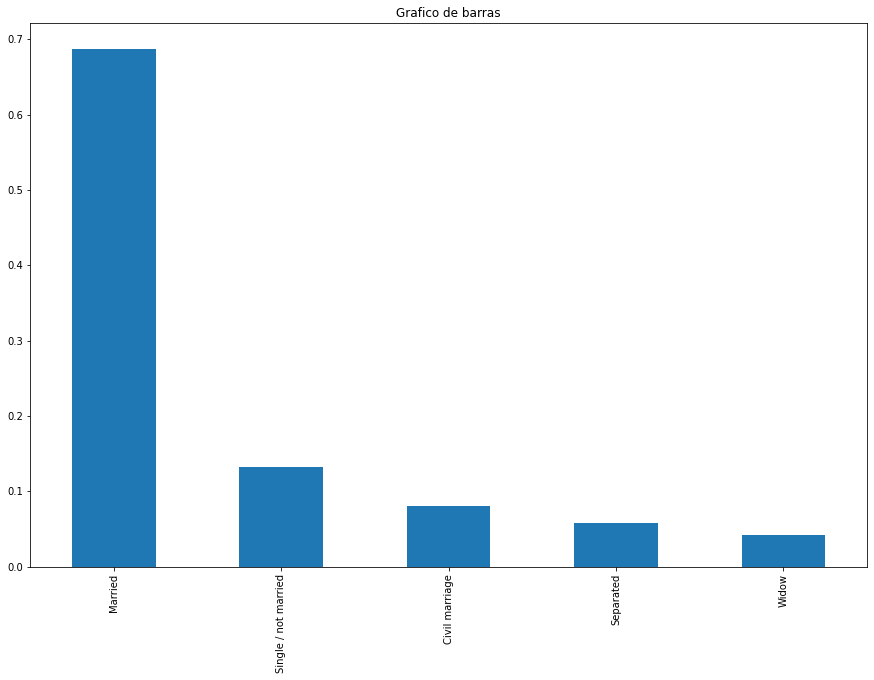

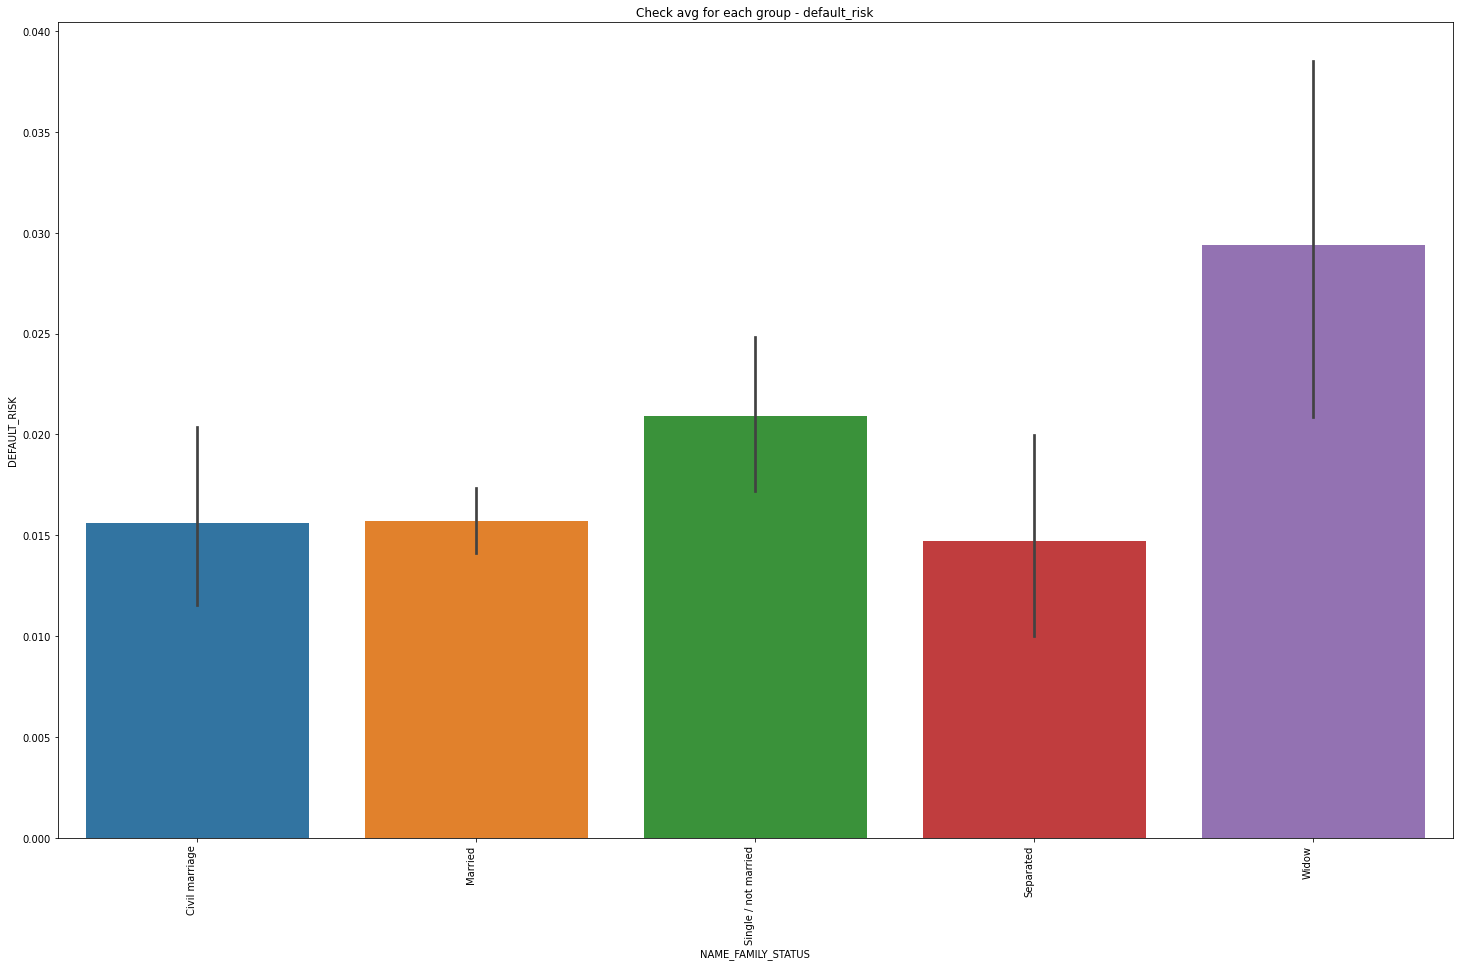

In [ ]:
nominal_des(credit_df,'NAME_FAMILY_STATUS','DEFAULT_RISK')

A maioria da pessoas são casadas. Aa pessoas casadas, casadas pelo civil e separadas parecem ter a mesma taxa de risco.


In [ ]:
family_status = test_chi(credit_df,'NAME_FAMILY_STATUS','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_FAMILY_STATUS and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK              0    1
NAME_FAMILY_STATUS              
Civil marriage         2899   46
Married               24655  393
Separated              2072   31
Single / not married   4728  101
Widow                  1487   45

Alpha=0.050, p=0.000
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(family_status)

V = 0.02463501190562218
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


As variaveis são dependentes porque o seu p-value é inferior ao alfa 0.05.

Através do teste Cramers V concluímos que tem 1 grau de liberdade e tem um valor de efeito estatistico quase insignificante.

**Então deverá ser uma variavel em conta para a modelação**


### `NAME_HOUSING_TYPE`

Valor percentual da coluna:
House / apartment      0.892778
With parents           0.048715
Municipal apartment    0.030941
Rented apartment       0.015772
Office apartment       0.007187
Co-op apartment        0.004608
Name: NAME_HOUSING_TYPE, dtype: float64

Valor quantitativo da coluna:
House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64



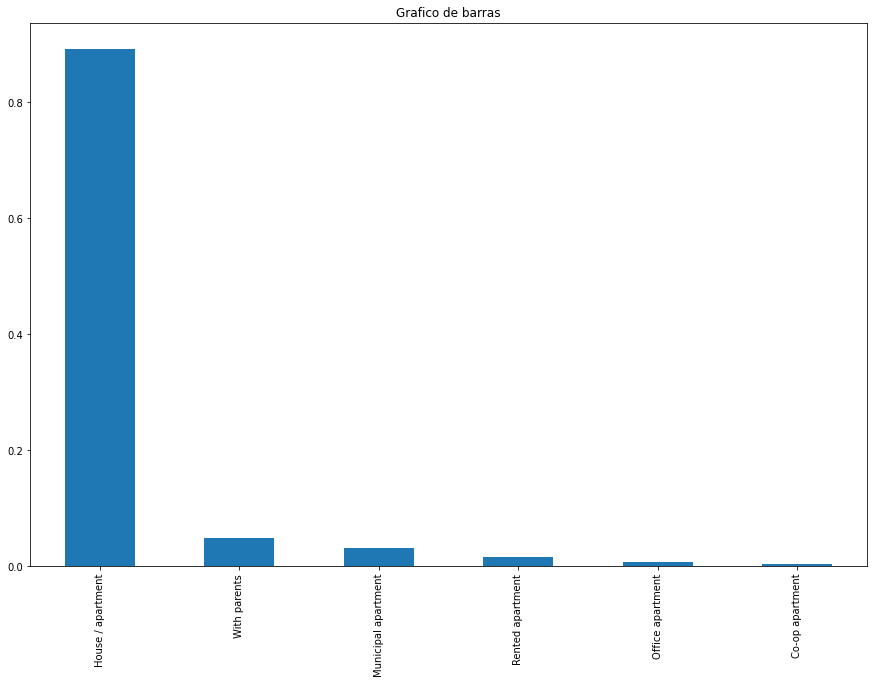

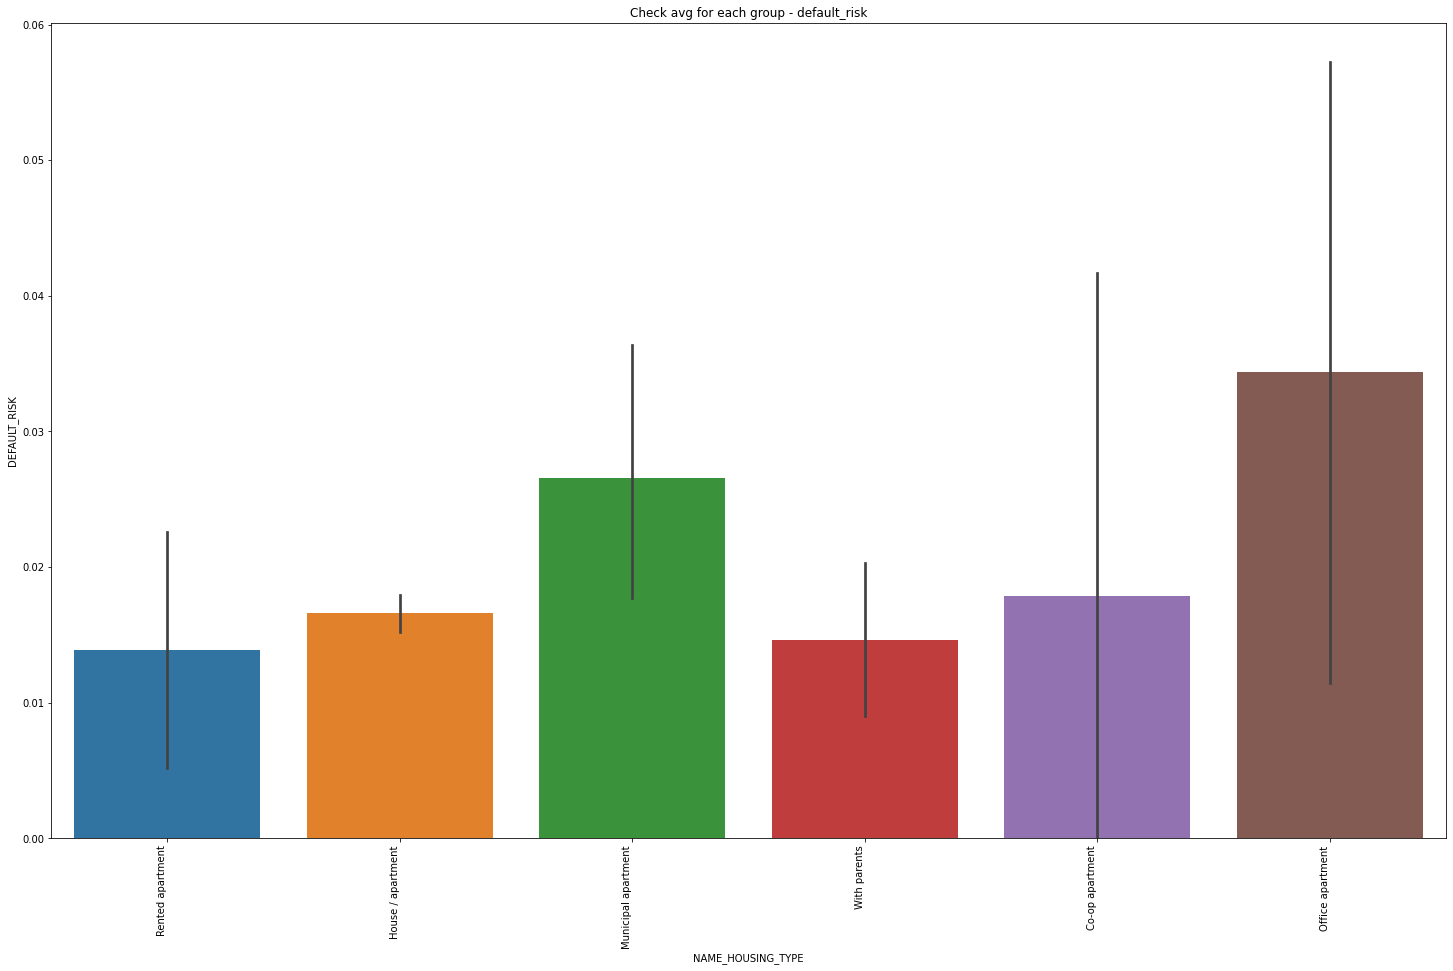

In [ ]:
nominal_des(credit_df,'NAME_HOUSING_TYPE','DEFAULT_RISK')

Mais de 80% dos candidatos tem casaa/apartamento. Parece haver algum tipo de relação entre as variaveis


In [ ]:
house_type = test_chi(credit_df,'NAME_HOUSING_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_HOUSING_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK             0    1
NAME_HOUSING_TYPE              
Co-op apartment        165    3
House / apartment    32008  540
Municipal apartment   1098   30
Office apartment       253    9
Rented apartment       567    8
With parents          1750   26

Alpha=0.050, p=0.032
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(house_type)

V = 0.018322167537498463
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


As variaveis sao dependentes porque o seu p-value é inferior ao alfa 0.05.

Através do teste Cramers V concluímos que tem 1 grau de liberdade e tem um valor de efeito estatistico quase insignificante.

**Então deverá ser uma variavel em conta para a modelação**

### `FLAG_MOBIL`

Valor percentual da coluna:
1    1.0
Name: FLAG_MOBIL, dtype: float64

Valor quantitativo da coluna:
1    36457
Name: FLAG_MOBIL, dtype: int64



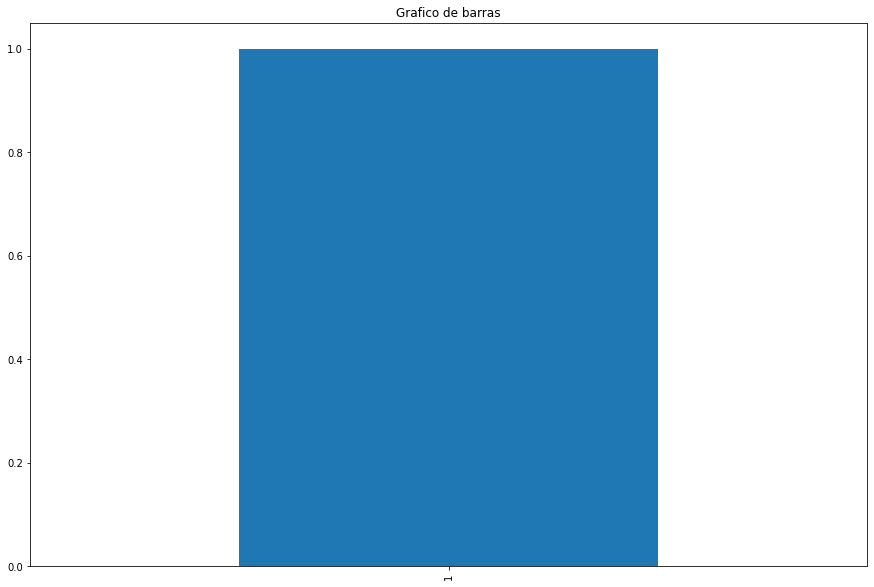

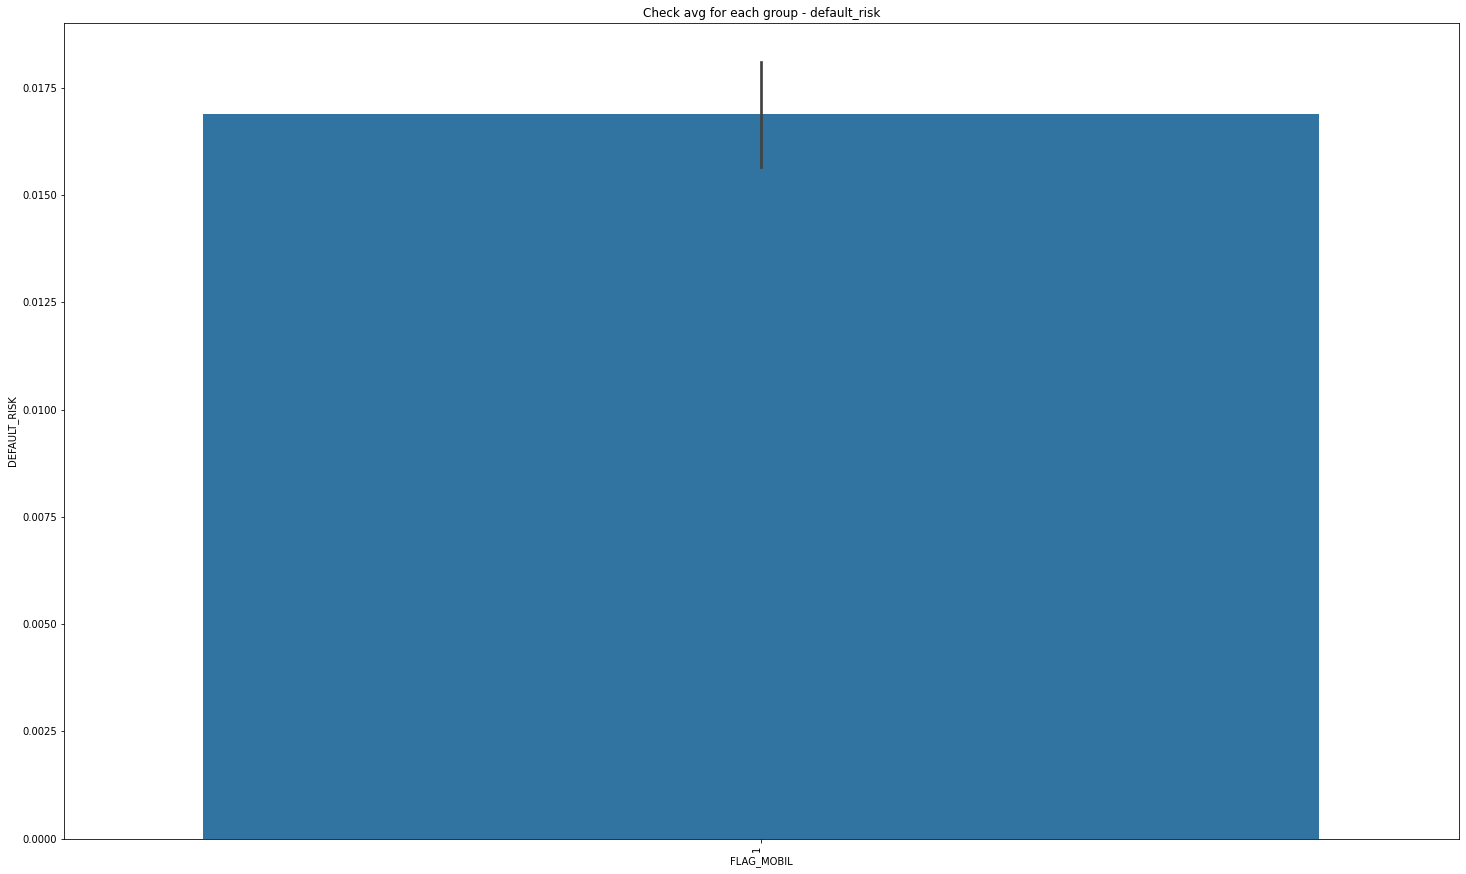

In [ ]:
nominal_des(credit_df,'FLAG_MOBIL','DEFAULT_RISK')

So existe um valor na variavel.

**Então não deverá ser uma variavel em conta para a modelação**


### `FLAG_WORK_PHONE`

Valor percentual da coluna:
0    0.774474
1    0.225526
Name: FLAG_WORK_PHONE, dtype: float64

Valor quantitativo da coluna:
0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64



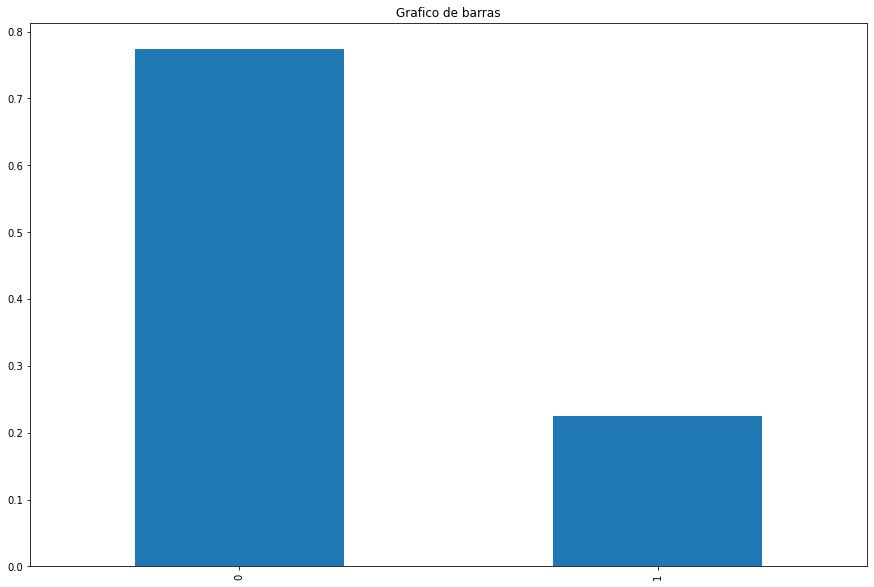

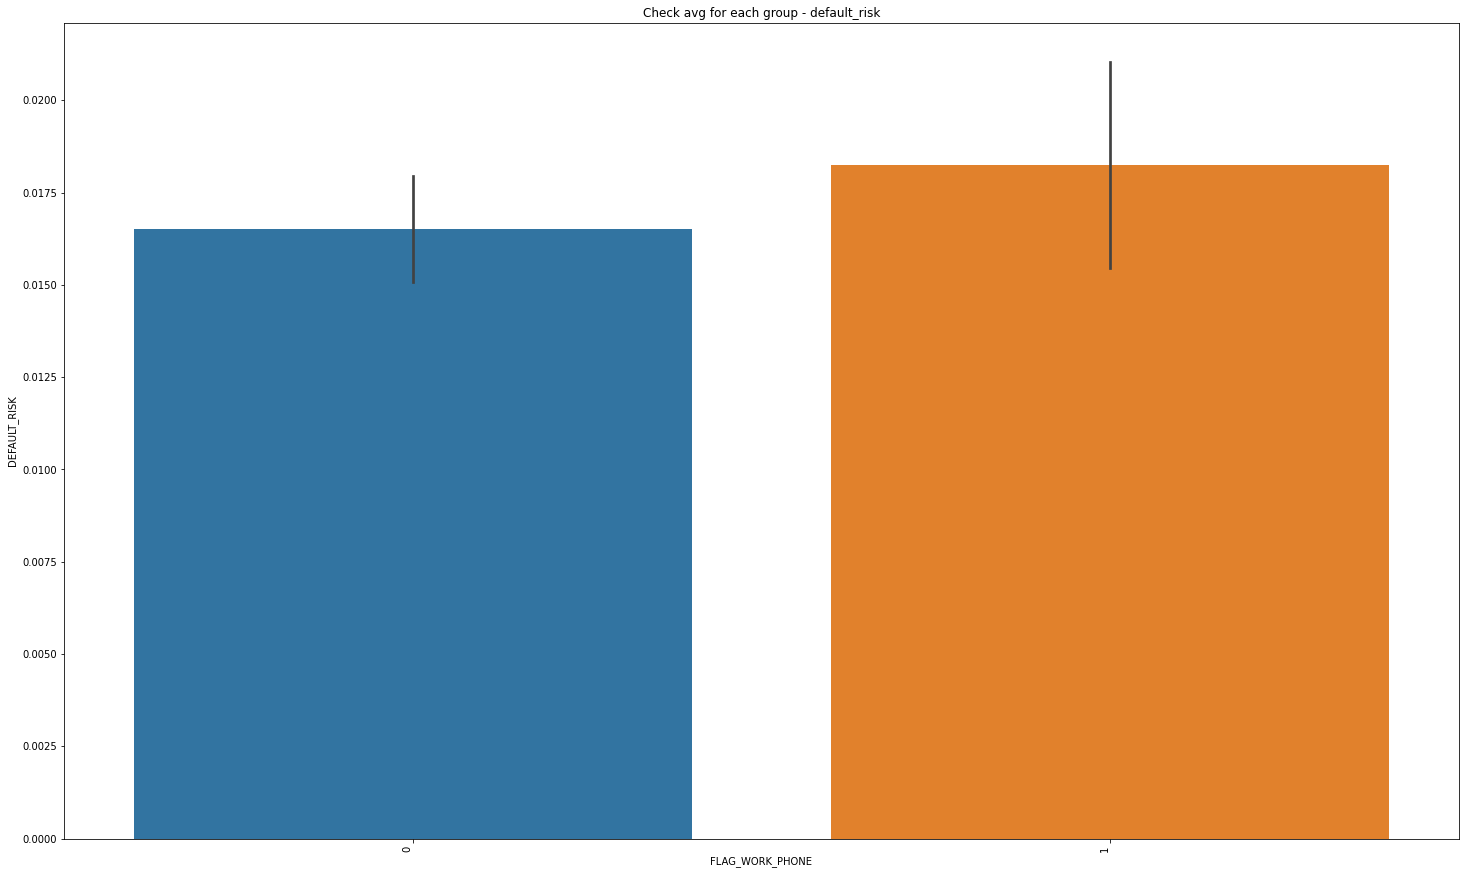

In [ ]:
nominal_des(credit_df,'FLAG_WORK_PHONE','DEFAULT_RISK')

A maior parte dos candidatos não tem um telemovel de trabalho, se formos comparar as medias com a variavel de risco elas estão muito proximas, apesar de os que tem tlm serem candidatos de risco


In [ ]:
work_phone=test_chi(credit_df,'FLAG_WORK_PHONE','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_WORK_PHONE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK         0    1
FLAG_WORK_PHONE            
0                27769  466
1                 8072  150

Alpha=0.050, p=0.304
Independent (fail to reject H0) p-value>alpha


As variaveis sao independentes porque o seu p-value é superior ao alfa 0.05 por isso não aplicamos o teste Cramer V, o que faz algum sentido, podem existir trabalhos que não facultem um telemovel de trabalho

**Então não deverá ser uma variavel em conta para a modelação**

### `FLAG_PHONE`

Valor percentual da coluna:
0    0.705187
1    0.294813
Name: FLAG_PHONE, dtype: float64

Valor quantitativo da coluna:
0    25709
1    10748
Name: FLAG_PHONE, dtype: int64



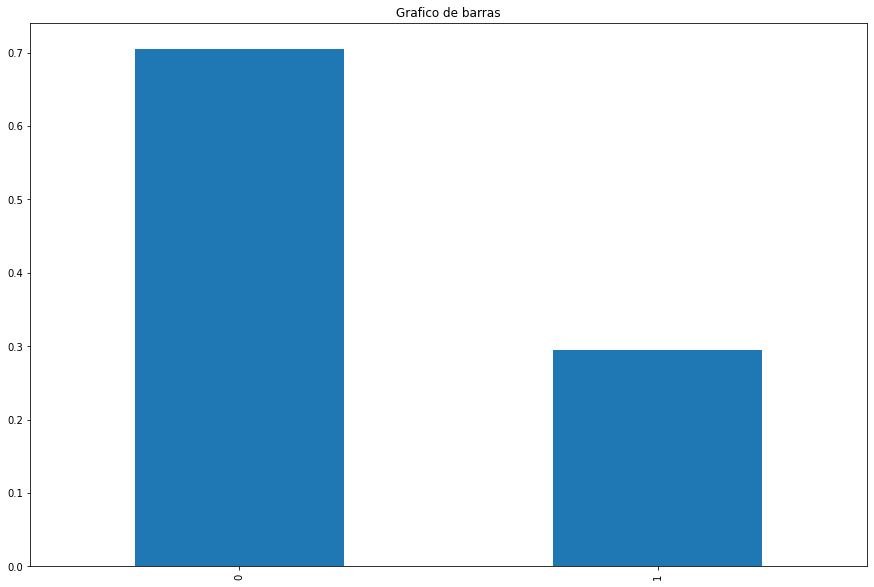

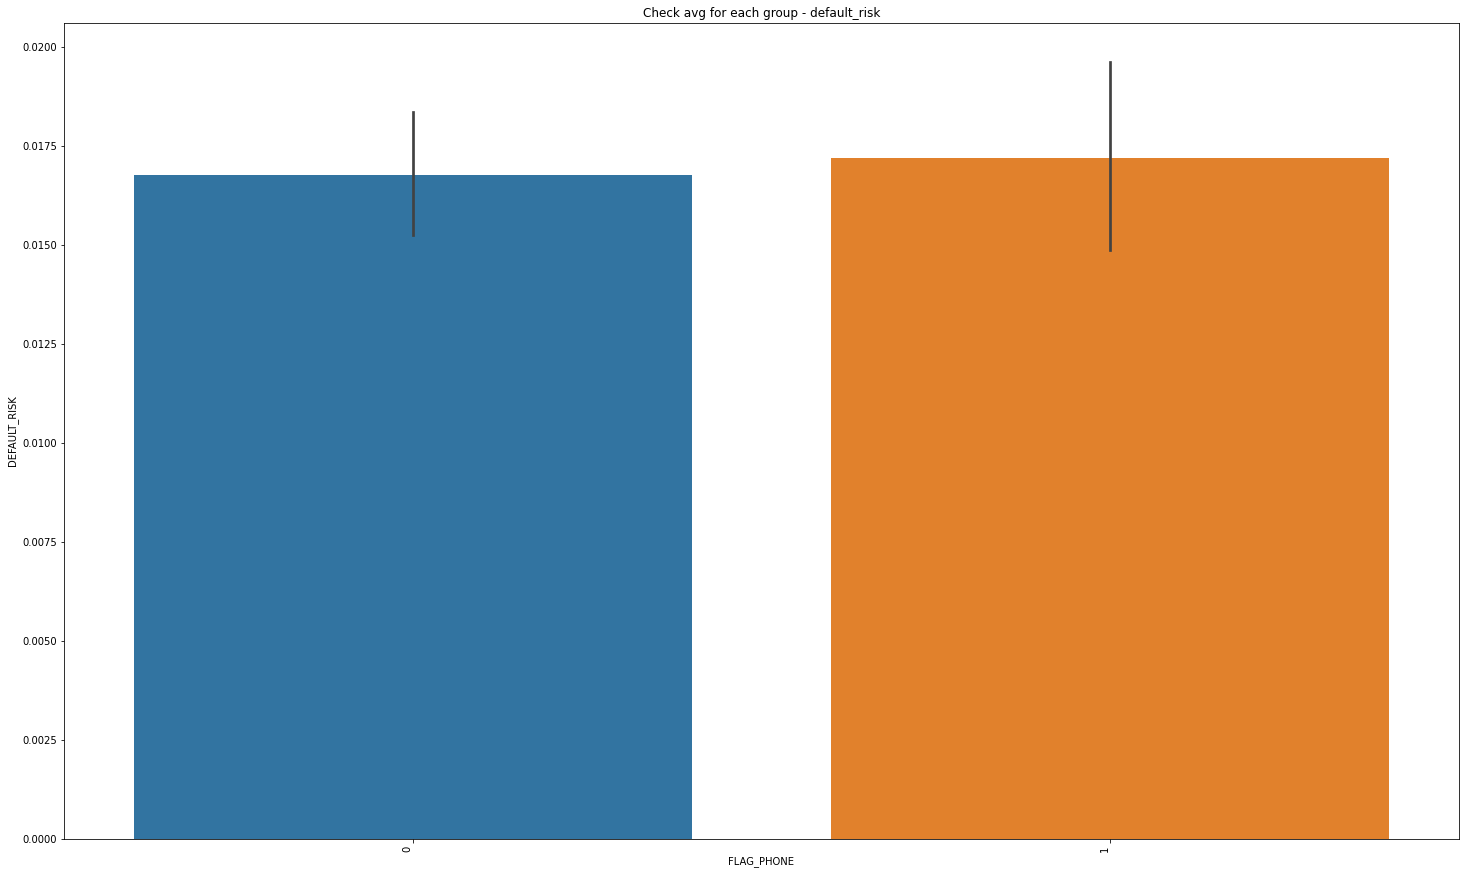

In [ ]:
nominal_des(credit_df,'FLAG_PHONE','DEFAULT_RISK')

In [ ]:
phone = test_chi(credit_df,'FLAG_PHONE','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_PHONE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
FLAG_PHONE              
0             25278  431
1             10563  185

Alpha=0.050, p=0.796
Independent (fail to reject H0) p-value>alpha


As variaveis sao independentes porque o seu p-value é superior ao alfa 0.05 por isso não aplicamos o teste Cramer V.

Ter um telefone ou não, não parece ser um factor de risco.

**Então não deverá ser uma variavel em conta para a modelação**

### `FLAG_EMAIL`

Valor percentual da coluna:
0    0.910278
1    0.089722
Name: FLAG_EMAIL, dtype: float64

Valor quantitativo da coluna:
0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64



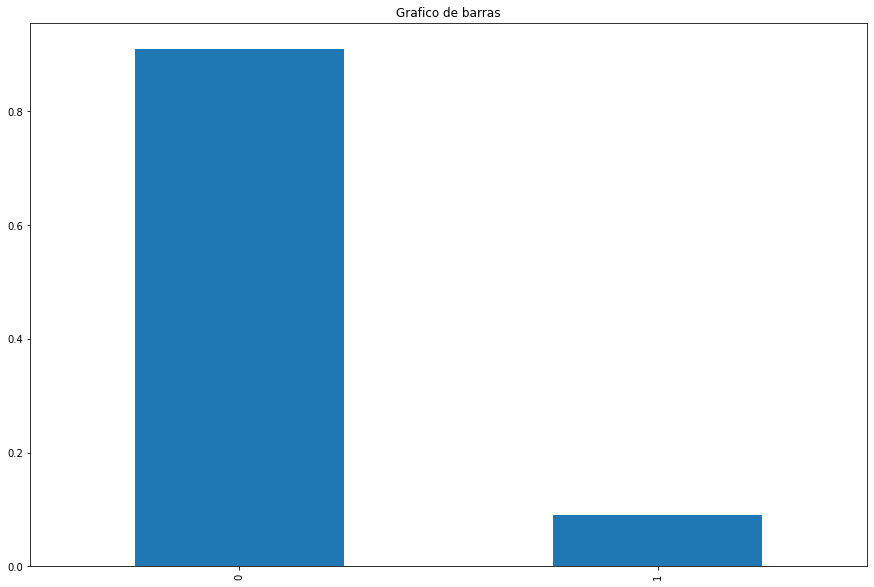

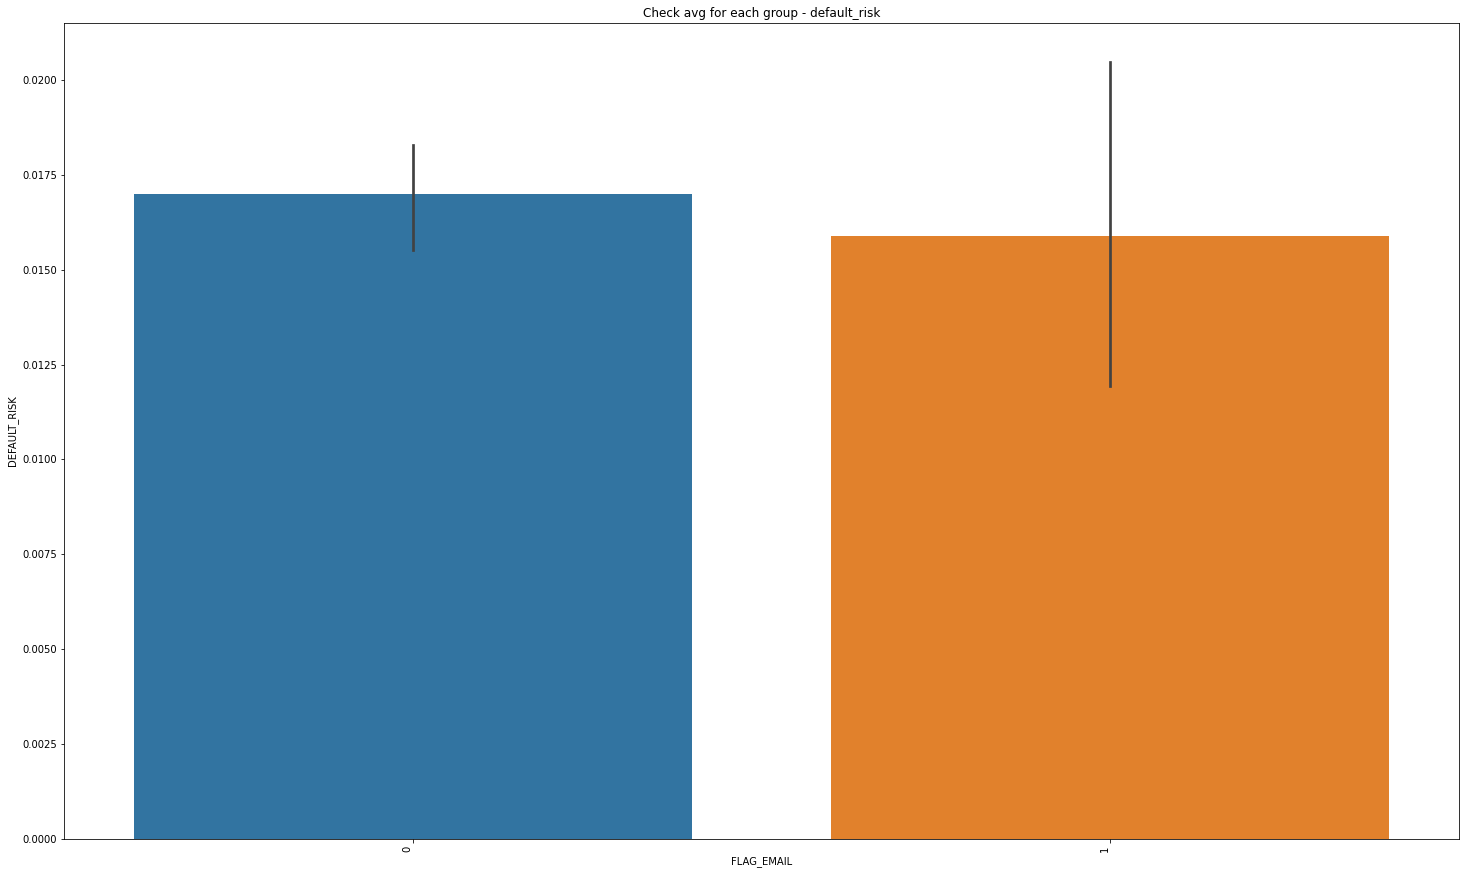

In [ ]:
nominal_des(credit_df,'FLAG_EMAIL','DEFAULT_RISK')

In [ ]:
email = test_chi(credit_df,'FLAG_PHONE','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_PHONE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
FLAG_PHONE              
0             25278  431
1             10563  185

Alpha=0.050, p=0.796
Independent (fail to reject H0) p-value>alpha


As variaveis sao independentes porque o seu p-value é superior ao alfa 0.05 por isso não aplicamos o teste Cramer V. 

Ter um email não é um fator de risco.


**Então não deverá ser uma variavel em conta para a modelação**


### `OCCUPATION_TYPE`


Valor percentual da coluna:
Laborers                 0.247115
Core staff               0.142874
Sales staff              0.138657
Managers                 0.119838
Drivers                  0.085064
High skill tech staff    0.055025
Accountants              0.049375
Medicine staff           0.048023
Cooking staff            0.026060
Security staff           0.023554
Cleaning staff           0.021922
Private service staff    0.013687
Low-skill Laborers       0.006963
Waiters/barmen staff     0.006923
Secretaries              0.006008
HR staff                 0.003382
Realty agents            0.003143
IT staff                 0.002387
Name: OCCUPATION_TYPE, dtype: float64

Valor quantitativo da coluna:
Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff       

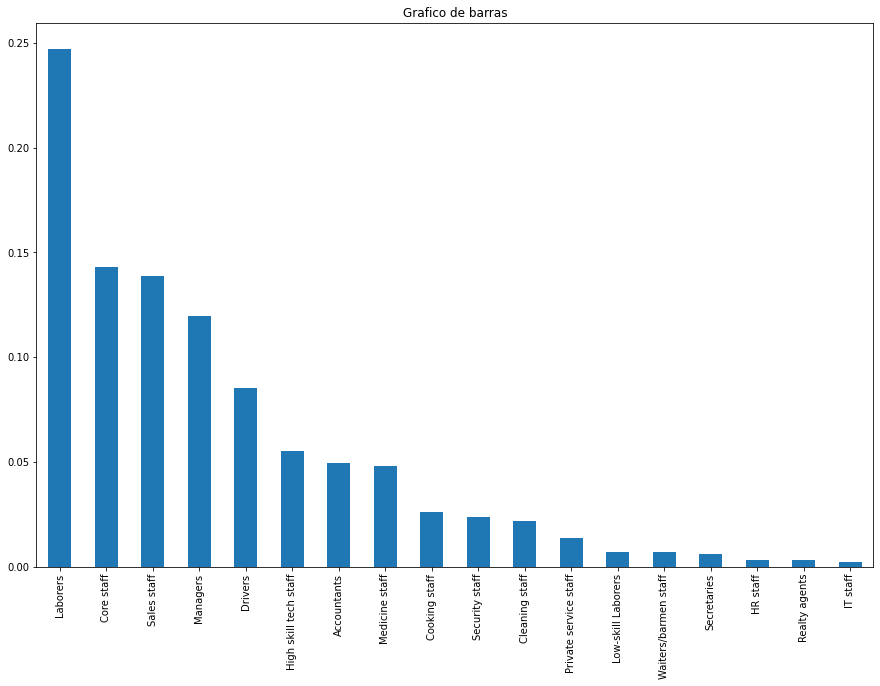

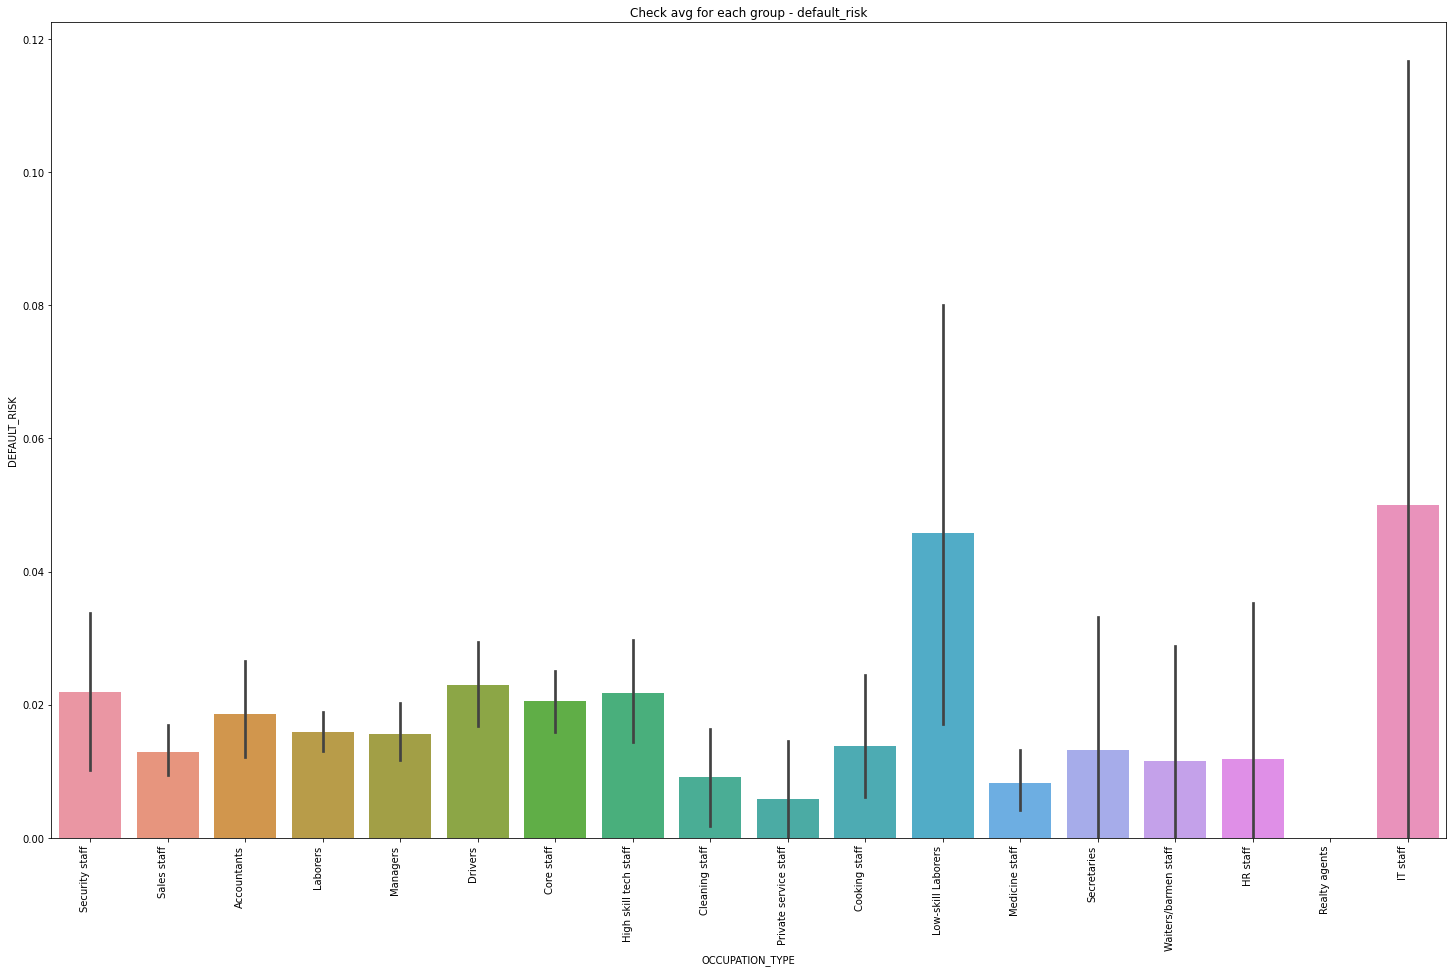

In [ ]:
nominal_des(credit_df,'OCCUPATION_TYPE','DEFAULT_RISK')

In [ ]:
occupation = test_chi(credit_df,'OCCUPATION_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables OCCUPATION_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK              0   1
OCCUPATION_TYPE                
Accountants            1218  23
Cleaning staff          546   5
Cooking staff           646   9
Core staff             3517  74
Drivers                2089  49
HR staff                 84   1
High skill tech staff  1353  30
IT staff                 57   3
Laborers               6112  99
Low-skill Laborers      167   8
Managers               2965  47
Medicine staff         1197  10
Private service staff   342   2
Realty agents            79   0
Sales staff            3440  45
Secretaries             149   2
Security staff          579  13
Waiters/barmen staff    172   2

Alpha=0.050, p=0.001
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(occupation)

V = 0.039822795383004476
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


As variáveis são dependentes porque o seu p-value é inferior ao alfa 0.05.

Através do teste Cramers V concluímos que tem 1 grau de liberdade e tem um valor de efeito estatistico quase insignificante.

**Então deverá ser uma variavel em conta para a modelação.**

# Answering Business Questions

In [ ]:
df2 = credit_df[['CODE_GENDER','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE','DEFAULT_RISK']]


### What seem to be the main contributing variables/features to a high (or low) default risk? Are they significant? Can you try to explain why?

* CODE_GENDER
* FLAG_OWN_REALTY	
* NAME_FAMILY_STATUS
*	NAME_HOUSING_TYPE
*	NAME_INCOME_TYPE
*	OCCUPATION_TYPE



As variáveis são importantes no sentido de perceber se os candidatos tem casa, qual o tipo de casa (se é alugada ou não). Pessoas casadas têm (supostamente uma maior resposnsabilidade), a forma como recebe o rendimento também pode ser importante no modelo, no sentido de perceber se é trabalhador ou pensionista. 

### What about the least contributing ones (if at all)? Do they make sense why?

Todas as outras variáveis não consideradas de risco, ou seja, variáveis independentes.

ID

Telefone


### Should we reject applicants according to all of these variables? If not, which ones we shouldn't consider and why? 

Don’t forget that credit card applications tend to have a meaningful impact on people’s lives, we need to choose our variables ***carefully***. We should avoid using discriminatory variables for deciding if a credit card application is accepted or not.

Não devemos considerar a variável CODE_GENDER, pois é descriminatório basear a escolha pelo género. O facto da nossa df ter o dobro de mulheres influencia a de forma negativa a interacção entre as variáveis. Devia haver uma equidade de entradas entre género para podermos ter um contexto mais abrangente. 

### Are there any other variables that you would like to have in order to better understand credit default risk? Which ones would you like to have? 

* que rendimento mensal.
* se tem empréstimos ativos.
* se tem bens a hipotecar.
* registo financeiro centralizado.
* vínculo contratual.
* tem fiador.

# Congratulations!

You deserve a huge round of applause if you've read everything up to this point! 

Oh and by tackling this Mission to finish your first Journey, of course yes...

![a round of applause!](https://media1.giphy.com/media/l3q2XhfQ8oCkm1Ts4/giphy.gif)